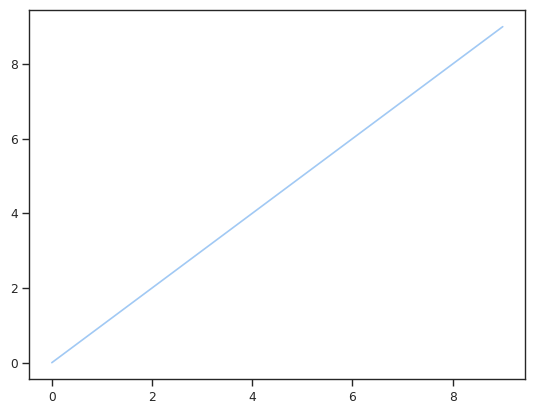

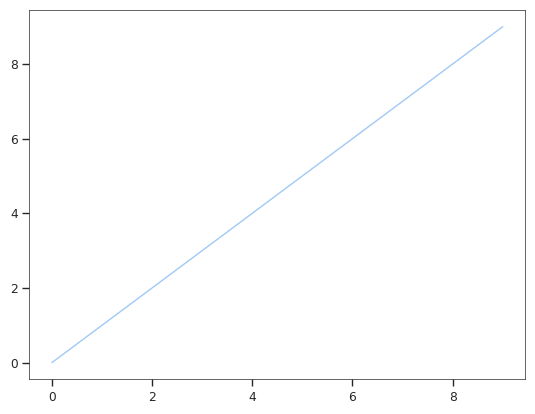

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
#mpl.use('pdf')
import sys
sys.path.append("../")
import copy
from Plotting.generate_database import ResultsDatabaseGenerator
from common_packages.utilities import get_equivalent_classical_layer_size, get_num_parameters_per_quantum_layer, get_total_parameters
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
import seaborn as sns
import os
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]
palette = sns.color_palette('pastel')
colors = palette.as_hex()

sns.set_style('ticks')
sns.set_context("paper")
plt.figure()
plt.plot(np.arange(10), np.arange(10))
plt.show()
#colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 8
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["axes.linewidth"] = 0.5

plt.figure()
plt.plot(np.arange(10), np.arange(10))
plt.show()
%load_ext autoreload
%autoreload 2

In [41]:
ex_path = "/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4"
ex_path_kerr8 = "/home/st4eve/Mounts/graham/synthetic_data/Classical_Small_kerr_v2"
ex_path_kerr8_all_weights = '/home/st4eve/Mounts/Classical_Small_kerr_all_weights2'
ex_path_kerr8_classical = '/home/st4eve/Mounts/graham/synthetic_data/Classical_Small_kerr_input_nl'
ex_path_kerr8_2q_high_cuttoff = '/home/st4eve/Mounts/graham/synthetic_data/Classical_Small_kerr_2q_high_cutoff'

def generate_database(ex_path):
    dbGen = ResultsDatabaseGenerator()
    dbGen.initialize_from_folder(ex_path)
    data = dbGen.data
    sample_key = list(data.keys())[0]
    config = data[sample_key]['config']
    config.pop('__doc__', None)
    #config.pop('iteration', None)
    df = pd.DataFrame(columns=config.keys())
    df['iteration'] = np.nan
    for key in data[sample_key]['metrics'].keys():
        df[key] = np.nan
    for i in data.keys():
        config = data[i]['config']
        config.pop('__doc__', None)
        try:
            config['iteration']
        except KeyError:
            config['iteration'] = 1
        if config['iteration'] != -1:
            metrics = data[i]['metrics']
            temp_dict = {}
            for key in metrics.keys():
                temp_dict[key] = metrics[key]
            for key in config.keys():
                temp_dict[key] = config[key]
            df.loc[i] = temp_dict
    if 'num_params' in df.columns:
        df['num_params'] = df['num_params'].apply(lambda x: x[0]).astype(int)
    else:
        df['num_params'] = df.apply(lambda x: get_total_parameters(x['num_qumodes'], x['n_layers']), axis=1)
    df.rename(columns={'accuracy': 'acc', 'val_accuracy': 'val_acc'}, inplace=True)
    return df

df_orig = generate_database(ex_path)
df_kerr8 = generate_database(ex_path_kerr8)
df_kerr8_all_weights = generate_database(ex_path_kerr8_all_weights)
df_kerr8_classical = generate_database(ex_path_kerr8_classical)
df_kerr8_high_cutoff = generate_database(ex_path_kerr8_2q_high_cuttoff)
display(df_kerr8.head())


df_kerr8.loc[df_kerr8['network_type']=='classical']['cutoff'] = -1
df_kerr8_all_weights.loc[df_kerr8_all_weights['network_type']=='classical', 'cutoff'] = -1
df_kerr8_all_weights.loc[df_kerr8_all_weights['network_type']=='classical','num_params'] = 124
df_kerr8_all_weights.loc[df_kerr8_all_weights['network_type']=='quantum','num_params'] = 120
# df_orig.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'iteration', 'num_params'], inplace=True)
df_kerr8.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'num_params', 'iteration'], inplace=True)

Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/171 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/170 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/72 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/180 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/46 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics fil

,cutoff,iteration,n_layers,network_type,num_qumodes,acc,epoch,loss,num_params,val_acc,val_loss
43377,-1,12,1,classical,2,"[0.3571428656578064, 0.3857142925262451, 0.418...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.34625244140625, 1.3204237222671509, 1.29121...",124,"[0.40666666626930237, 0.41999998688697815, 0.4...","[1.3192541599273682, 1.29547119140625, 1.26383..."
10021,5,3,4,quantum,2,"[0.24571429193019867, 0.33000001311302185, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3984118700027466, 1.3808526992797852, 1.366...",174,"[0.3233333230018616, 0.35333332419395447, 0.37...","[1.3875383138656616, 1.3726577758789062, 1.358..."
43444,-1,14,5,classical,3,"[0.22285714745521545, 0.27571427822113037, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3857241868972778, 1.3740355968475342, 1.317...",313,"[0.21666666865348816, 0.2800000011920929, 0.31...","[1.3817356824874878, 1.3571125268936157, 1.269..."
205,11,5,3,quantum,2,"[0.27000001072883606, 0.3700000047683716, 0.39...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4692503213882446, 1.381722092628479, 1.3548...",156,"[0.28999999165534973, 0.43666666746139526, 0.4...","[1.4030747413635254, 1.3682924509048462, 1.339..."
43461,-1,15,2,classical,5,"[0.2628571391105652, 0.30571427941322327, 0.40...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3823882341384888, 1.3529642820358276, 1.286...",423,"[0.3400000035762787, 0.4466666579246521, 0.426...","[1.3696295022964478, 1.3248122930526733, 1.224..."


/tmp/ipykernel_9848/1266812630.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kerr8.loc[df_kerr8['network_type']=='classical']['cutoff'] = -1


In [42]:
df_kerr8.drop(df_kerr8[df_kerr8['network_type']=='classical'].index, inplace=True)
df_kerr8_all_weights.drop(df_kerr8_all_weights[df_kerr8_all_weights['network_type']=='classical'].index, inplace=True)
df_kerr8_all_weights = pd.concat([df_kerr8_all_weights, df_kerr8_classical], ignore_index=False)
df_kerr8 = pd.concat([df_kerr8, df_kerr8_all_weights], ignore_index=False)
# df_kerr8 = pd.concat([df_kerr8, df_kerr8_high_cutoff], ignore_index=False)
display(df_kerr8)

,cutoff,iteration,n_layers,network_type,num_qumodes,acc,epoch,loss,num_params,val_acc,val_loss
10021,5,3,4,quantum,2,"[0.24571429193019867, 0.33000001311302185, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3984118700027466, 1.3808526992797852, 1.366...",174,"[0.3233333230018616, 0.35333332419395447, 0.37...","[1.3875383138656616, 1.3726577758789062, 1.358..."
205,11,5,3,quantum,2,"[0.27000001072883606, 0.3700000047683716, 0.39...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4692503213882446, 1.381722092628479, 1.3548...",156,"[0.28999999165534973, 0.43666666746139526, 0.4...","[1.4030747413635254, 1.3682924509048462, 1.339..."
40,9,1,5,quantum,2,"[0.2571428716182709, 0.31142857670783997, 0.44...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4132672548294067, 1.3883931636810303, 1.367...",192,"[0.33666667342185974, 0.273333340883255, 0.373...","[1.3985556364059448, 1.381257176399231, 1.3627..."
424,9,10,3,quantum,2,"[0.2514285743236542, 0.25285714864730835, 0.32...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4042835235595703, 1.383934497833252, 1.3696...",156,"[0.25333333015441895, 0.28999999165534973, 0.3...","[1.3915009498596191, 1.378548264503479, 1.3655..."
381,5,9,3,quantum,2,"[0.25, 0.2871428430080414, 0.3985714316368103,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3981094360351562, 1.3749626874923706, 1.358...",156,"[0.24666666984558105, 0.30666667222976685, 0.4...","[1.3814302682876587, 1.3695231676101685, 1.349..."
...,...,...,...,...,...,...,...,...,...,...,...
451,-1,21,5,classical,4,"[0.272857129573822, 0.33571428060531616, 0.348...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.379526972770691, 1.360700011253357, 1.34248...",433,"[0.28333333134651184, 0.3400000035762787, 0.37...","[1.3707119226455688, 1.3540189266204834, 1.336..."
440,-1,21,4,classical,1,"[0.22714285552501678, 0.23571428656578064, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864580392837524, 1.3863434791564941, 1.386...",87,"[0.25, 0.25333333015441895, 0.25, 0.2533333301...","[1.3862926959991455, 1.386282205581665, 1.3862..."
673,-1,30,5,classical,2,"[0.22428570687770844, 0.2542857229709625, 0.22...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864585161209106, 1.3864023685455322, 1.386...",193,"[0.25333333015441895, 0.25333333015441895, 0.2...","[1.3863000869750977, 1.3862823247909546, 1.386..."
547,-1,25,4,classical,1,"[0.23999999463558197, 0.25, 0.25, 0.25, 0.25, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864778280258179, 1.386339783668518, 1.3863...",87,"[0.25, 0.25, 0.25, 0.25, 0.25333333015441895, ...","[1.38629949092865, 1.3862861394882202, 1.38627..."


In [43]:
print(len(df_kerr8))
print(df_kerr8['cutoff'].unique())
print(df_kerr8['iteration'].unique())

1001
[ 5 11  9 -1]
[ 3  5  1 10  9  4  2  6  7  8 12 24 25 20 19 26 28 11 15 16 17 14 13 30
 22 29 27 23 21 18]


/tmp/ipykernel_9848/887185939.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'classical' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_orig.loc[df_orig['network_type']=='classical', 'cutoff'] = 'classical'
/tmp/ipykernel_9848/887185939.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_mean = df.groupby(groups).apply(lambda x: pd.DataFrame({
/tmp/ipykernel_9848/887185939.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the 

Kerr Input 8


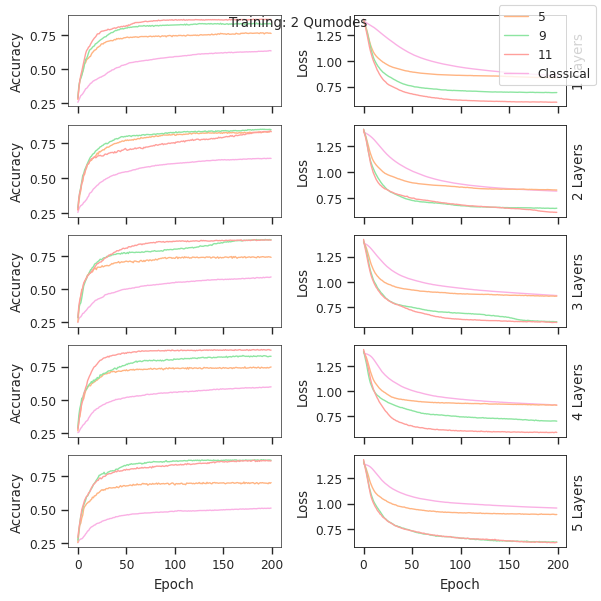

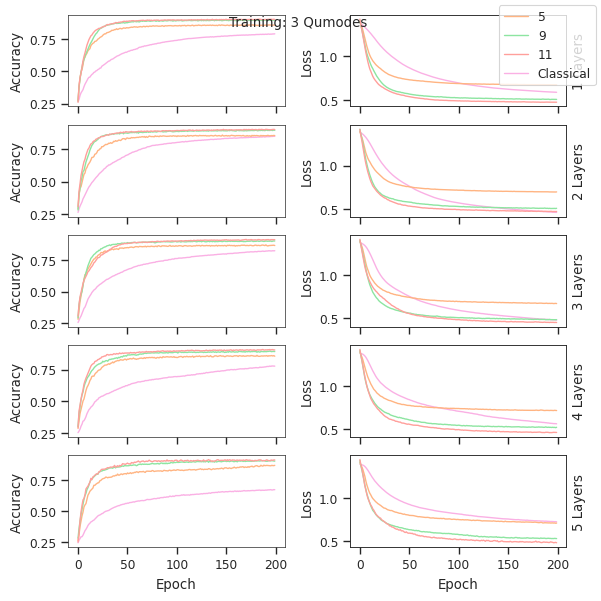

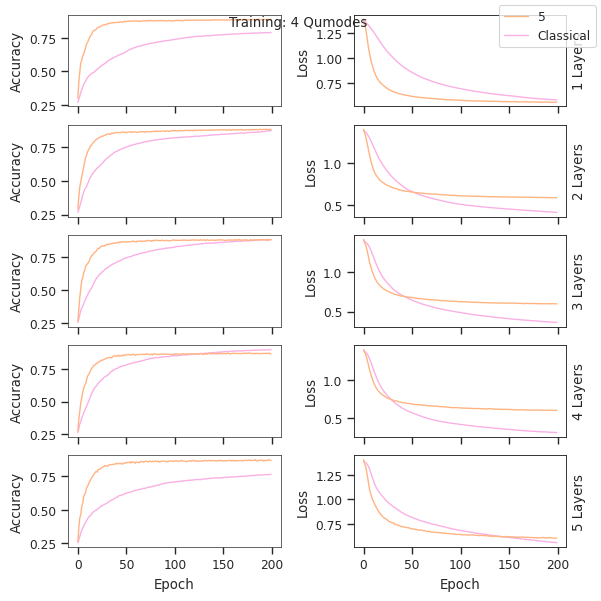

/tmp/ipykernel_9848/887185939.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_mean = df.groupby(groups).apply(lambda x: pd.DataFrame({
/tmp/ipykernel_9848/887185939.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_std = df.groupby(groups).apply(lambda x: pd.DataFrame({
/tmp/ipykernel_9848/887185939.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavio

In [44]:
df_orig.loc[df_orig['network_type']=='classical', 'cutoff'] = 'classical'
df_orig.drop(df_orig[df_orig['cutoff']==1].index, inplace=True)
def process_data(df, groups=['cutoff','network_type', 'n_layers', 'num_qumodes', 'num_params']):
    df_mean = df.groupby(groups).apply(lambda x: pd.DataFrame({
        'acc': [np.mean(x['acc'].tolist(), axis=0)],
        'val_acc': [np.mean(x['val_acc'].tolist(), axis=0)],
        'loss': [np.mean(x['loss'].tolist(), axis=0)],
        'val_loss': [np.mean(x['val_loss'].tolist(), axis=0)],
        'num_exps': [len(x['acc'].tolist())],
        'raw_data':[x['acc'].tolist()]
    }))

    df_std = df.groupby(groups).apply(lambda x: pd.DataFrame({
        'acc_std': [np.std(x['acc'].tolist(), axis=0)],
        'val_acc_std': [np.std(x['val_acc'].tolist(), axis=0)],
        'loss_std': [np.std(x['loss'].tolist(), axis=0)],
        'val_loss_std': [np.std(x['val_loss'].tolist(), axis=0)]
    }))
    df_max = df.groupby(groups).apply(lambda x: pd.DataFrame({
        'acc_max': [np.max(x['acc'].tolist(), axis=0)],
        'val_acc_max': [np.max(x['val_acc'].tolist(), axis=0)],
        'loss_min': [np.min(x['loss'].tolist(), axis=0)],
        'val_loss_min': [np.min(x['val_loss'].tolist(), axis=0)]
    }))
    df_out = pd.concat([df_mean, df_std, df_max], axis=1, ignore_index=False)
    df_out.reset_index(inplace=True)
    df_out.drop(columns=f'level_{len(groups)}', inplace=True)
    df_out.sort_values(['network_type', 'num_qumodes', 'n_layers'], inplace=True)
    return df_out

df_o = process_data(df_orig)
df_k8 = process_data(df_kerr8)
df_k8_all_weights = process_data(df_kerr8_all_weights)

def plot_training_cutoff_sweep(df, fname='cutoff_sweep', dataset='training'):
    os.makedirs(f'./figures/{fname}_plots', exist_ok=True)

    for n in df.loc[df['network_type']=='quantum', 'num_qumodes'].unique():
        df_n = df[df['num_qumodes']==n]
        fig, axs = plt.subplots(ncols=2, nrows=len(df['n_layers'].unique()), figsize=(6,6), sharex=True)
        color_dict = dict(zip(df[df['num_qumodes']==n]['cutoff'].unique(), colors))
        color_dict[-1] = colors[-4]
        for i in df_n.loc[df_n['network_type']=='quantum', 'n_layers'].unique():
            ax2  = axs[i-1,1].twinx()
            ax2.set_yticks([])
            ax2.set_yticklabels([])
            ax2.set_ylabel(f'{i} Layers')
        prefix = 'val_' if dataset=='validation' else '' 
        for i, row in df_n.iterrows():
            idx_row = row['n_layers'] - 1
            epochs = [i for i in range(len(row[prefix+'acc']))]
            axs[idx_row, 0].plot(epochs, row[prefix+'acc'], color=color_dict[row['cutoff']])
            axs[idx_row, 1].plot(epochs, row[prefix+'loss'], color=color_dict[row['cutoff']])
            
            axs[-1,0].set_xlabel('Epoch')
            axs[-1,1].set_xlabel('Epoch')
            axs[idx_row,0].set_ylabel('Accuracy')
            axs[idx_row,1].set_ylabel('Loss')

        color_dict['classical'] = color_dict[-1]
        color_dict.pop(-1)
        for key,val in color_dict.items():
            plt.plot([], [], color=val, label=f'{key}'.capitalize())

        fig.legend()
        fig.tight_layout()
        fig.suptitle(f'{dataset.capitalize()}: {n} Qumodes')
        plt.savefig(f'./figures/{fname}_plots/{fname}_{dataset.capitalize()}_{n}qumodes.png', dpi=300)
        plt.show()

def plot_encoding_comparison(df, fname='encoding comparison', dataset='training'):
    os.makedirs(f'./figures/{fname}_plots', exist_ok=True)
    for n in df.loc[df['network_type']=='quantum', 'num_qumodes'].unique():
        df_n = df[(df['num_qumodes']==n) & (df['network_type']=='quantum')]
        fig, axs = plt.subplots(ncols=2, nrows=len(df_n['n_layers'].unique()), figsize=(6,6), sharex=True, sharey='col')
        color_dict = dict(zip(df_n['encoding'].unique(), colors))
        style_dict = dict(zip(df_n['cutoff'].unique(), ['-', '--', '-.', ':']))
        for i in df_n.loc[df_n['network_type']=='quantum', 'n_layers'].unique():
            ax2  = axs[i-1,1].twinx()
            ax2.set_yticks([])
            ax2.set_yticklabels([])
            ax2.set_ylabel(f'{i} Layers')
        prefix = 'val_' if dataset=='validation' else '' 
        for i, row in df_n.iterrows():
            idx_row = row['n_layers'] - 1
            epochs = [i for i in range(len(row[prefix+'acc']))]
            axs[idx_row, 0].plot(epochs, row[prefix+'acc'], color=color_dict[row['encoding']], linestyle=style_dict[row['cutoff']])
            axs[idx_row, 1].plot(epochs, row[prefix+'loss'], color=color_dict[row['encoding']], linestyle=style_dict[row['cutoff']])
            
            axs[-1,0].set_xlabel('Epoch')
            axs[-1,1].set_xlabel('Epoch')
            axs[idx_row,0].set_ylabel('Accuracy')
            axs[idx_row,1].set_ylabel('Loss')


        for key,val in color_dict.items():
            plt.plot([], [], color=val, label=f'{key}'.capitalize())
        for key,val in style_dict.items():
            plt.plot([], [], color='black', linestyle=val, label=f'{key}'.capitalize())

        fig.legend()
        fig.tight_layout()
        fig.suptitle(f'{dataset.capitalize()}: {n} Qumodes')
        plt.savefig(f'./figures/{fname}_plots/{fname}_{dataset.capitalize()}_{n}qumodes.png', dpi=300)
        plt.show()

#plot_training_cutoff_sweep(df_o, 'cutoff_sweep', dataset='validation')
# plot_training_cutoff_sweep(df_k, 'cutoff_sweep_kerr', dataset='validation')

print('Kerr Input 8')
plot_training_cutoff_sweep(df_k8, 'cutoff_sweep_kerr8')

encodings = {'displacement': df_orig, 'kerr': df_kerr8}
df_full = pd.concat(encodings, names=['encoding'])
df_f = process_data(df_full, groups=['encoding', 'network_type', 'n_layers', 'num_qumodes', 'num_params', 'cutoff'])

#plot_encoding_comparison(df_f, 'encoding_comparison', dataset='training')


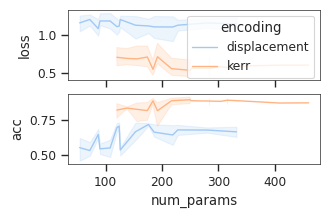

In [45]:

def generate_averaged_database(df):
    df_mean = copy.deepcopy(df)
    df_mean['acc'] = df_mean['acc'].apply(lambda x: x[-1])
    df_mean['acc_max'] = df_mean['acc_max'].apply(lambda x: x[-1])
    df_mean['acc_std'] = df_mean['acc_std'].apply(lambda x: x[-1])
    df_mean['acc_max_std'] = df_mean['acc_std'] 
    df_mean['val_acc'] = df_mean['val_acc'].apply(lambda x: x[-1])
    df_mean['val_acc_std'] = df_mean['val_acc_std'].apply(lambda x: x[-1])
    df_mean['val_acc_max'] = df_mean['val_acc_max'].apply(lambda x: x[-1])
    df_mean['loss'] = df_mean['loss'].apply(lambda x: x[-1])
    df_mean['loss_std'] = df_mean['loss_std'].apply(lambda x: x[-1])
    df_mean['loss_min'] = df_mean['loss_min'].apply(lambda x: x[-1])
    df_mean['val_loss'] = df_mean['val_loss'].apply(lambda x: x[-1])
    df_mean['val_loss_min'] = df_mean['val_loss_min'].apply(lambda x: x[-1])
    df_mean['val_loss_std'] = df_mean['val_loss_std'].apply(lambda x: x[-1])
    df_mean['acc_ratio'] = df_mean['acc']/df_mean['num_params']
    df_mean['acc_ratio_std'] = df_mean['acc_std']/df_mean['num_params']
    df_mean['val_acc_ratio'] = df_mean['val_acc']/df_mean['num_params']
    df_mean['val_acc_ratio_std'] = df_mean['val_acc_std']/df_mean['num_params']
    df_mean['loss_ratio'] = df_mean['loss']/df_mean['num_params']
    df_mean['loss_ratio_std'] = df_mean['loss_std']/df_mean['num_params']
    df_mean['val_loss_ratio'] = df_mean['val_loss']/df_mean['num_params']
    df_mean['val_loss_ratio_std'] = df_mean['val_loss_std']/df_mean['num_params']
    df_mean.sort_values('num_params')
    return df_mean

def plot_acc_per_param(df, fname='AccPerParam', cutoffs=[3,7,9,'classical']):
    color_dict = dict(zip(cutoffs, colors))
    color_dict['classical'] = colors[-1]
    metrics = ['acc', 'loss']
    axs_labels_dict = dict(zip(metrics, ['Accuracy', 'Loss', 'Accuracy', 'Loss']))
    for n in df['num_qumodes'].unique():
        fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True)
        axs_dict = dict(zip(metrics, axs.flatten()))
        for cutoff in cutoffs:
            row = df.loc[(df['num_qumodes']==n) & (df['cutoff']==cutoff)]
            for metric in metrics:
                axs_dict[metric].errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
                axs_dict[metric].plot(row['num_params'].values, row[metric].values, '--', color=color_dict[cutoff], alpha=0.8)


        for key,val in color_dict.items():
            plt.plot([], [], color=val, label=f'{key}'.capitalize())

        # ax2  = axs[0].twinx()
        # ax2.set_yticks([])
        # ax2.set_yticklabels([])
        # ax2.set_ylabel(f'Training') 
    
        # ax2  = axs[1].twinx()
        # ax2.set_yticks([])
        # ax2.set_yticklabels([])
        # ax2.set_ylabel(f'Testing')   

        fig.legend()
        fig.supxlabel('Number of Parameters')
        fig.suptitle(f'{n} Qumodes')

        for key, val in axs_labels_dict.items():
            axs_dict[key].set_ylabel(val)
        fig.tight_layout()
        plt.savefig(f'cutoff_sweep_plots/{fname}_AccPerParam_{n}qumodes.png', dpi=300)
        plt.show()


    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True)
    axs_dict = dict(zip(metrics, axs.flatten()))
    axs[0].axvline(x=df[df['num_qumodes']==4]['num_params'].min(), color='k', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==4]['num_params'].max(), color='k', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==3]['num_params'].min(), color='b', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==3]['num_params'].max(), color='b', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==2]['num_params'].min(), color='r', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==2]['num_params'].max(), color='r', linestyle='--')
    for cutoff in cutoffs:
            row = copy.deepcopy(df[(df['cutoff']==cutoff)])
            row.sort_values('num_params', inplace=True)
            for metric in metrics:
                #axs_dict[metric].errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
                axs_dict[metric].plot(row['num_params'].values, row[metric].values, '-', marker='.', color=color_dict[cutoff], alpha=0.8)

    for key,val in color_dict.items():
        plt.plot([], [], color=val, label=f'{key}'.capitalize())

    # ax2  = axs[1].twinx()
    # ax2.set_yticks([])
    # ax2.set_yticklabels([])
    # ax2.set_ylabel(f'Training') 

    # ax2  = axs[1].twinx()
    # ax2.set_yticks([])
    # ax2.set_yticklabels([])
    # ax2.set_ylabel(f'Testing')   

    fig.legend()
    fig.supxlabel('Number of Parameters')
    fig.suptitle(f'All Qumodes')
    for key, val in axs_labels_dict.items():
        axs_dict[key].set_ylabel(val)
    fig.tight_layout()
    plt.savefig(f'cutoff_sweep_plots/{fname}_AccPerParam_allqumodes.png', dpi=300)
    plt.savefig(f'cutoff_sweep_plots/{fname}_AccPerParam_allqumodes.svg')
    plt.show()
    
    
    # fig, axs = plt.subplots(figsize=(6,6), sharex=True)
    # metric = 'val_acc'
    # for cutoff in cutoffs:
    #     row = copy.deepcopy(df[(df['cutoff']==cutoff)])
    #     row.sort_values('num_params', inplace=True)
    #     #axs.errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
    #     axs.plot(row['num_params'].values, row[metric].values, '-', color=color_dict[cutoff], alpha=0.8)

    # for key in cutoffs:
    #     plt.plot([], [], color=color_dict[key], label=f'{key}'.capitalize()) 

    # fig.legend()
    # fig.supxlabel('Number of Parameters')
    # axs.set_ylabel('Validation Accuracy')
    # fig.tight_layout()
    # plt.savefig(f'cutoff_sweep_plots/{fname}_AccLarg_allqumodes.png', dpi=300)
    # plt.show()


    
    

df_o_mean = generate_averaged_database(df_o)
df_k8_mean = generate_averaged_database(df_k8)
df_k8_all_weights_mean = generate_averaged_database(df_k8_all_weights)

#plot_acc_per_param(df_o_mean, 'cutoff_sweep', cutoffs=[5,3, 7, 9, 'classical'])
#plot_acc_per_param(df_k_mean, 'cutoff_sweep_kerr', cutoffs=[5,10,'classical'])
#plot_acc_per_param(df_k8_mean, 'cutoff_sweep_kerr8', cutoffs=[5,'classical'])


# def plot_comparison(metric, ylabel='Validation Accuracy'):
#     fig, axs = plt.subplots(figsize=(6,6), sharex=True)
#     color_dict = dict(zip([5,7,10,'classical'], colors))
#     for cutoff in [7,'classical']:
#         row = copy.deepcopy(df_o_mean[(df_o_mean['cutoff']==cutoff)])
#         row.sort_values('num_params', inplace=True)
#         #axs.errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
#         axs.plot(row['num_params'].values, row[metric].values, '--', color=color_dict[cutoff], alpha=0.8)
#         #axs.fill_between(row['num_params'].values, row[metric]-row[f'{metric}_std'], row[metric]+row[f'{metric}_std'], color=color_dict[cutoff], alpha=0.1)
#     for cutoff in [10,'classical']:
#         row = copy.deepcopy(df_k_mean[(df_k_mean['cutoff']==cutoff)])
#         row.sort_values('num_params', inplace=True)
#         #axs.errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
#         axs.plot(row['num_params'].values, row[metric].values, '--', color=color_dict[cutoff], alpha=0.8)
#         #axs.fill_between(row['num_params'].values, row[metric]-row[f'{metric}_std'], row[metric]+row[f'{metric}_std'], color=color_dict[cutoff], alpha=0.1)

#     def legend(label, color, linestyle='-', marker=''):
#         plt.plot([],[], color=color, ls=linestyle, marker=marker, label=label.capitalize())
#         return

# plot_comparison('val_acc', 'Validation Accuracy')
# plot_comparison('loss', 'Loss')

df_f_mean = generate_averaged_database(df_f)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(3.25, 2), sharex=True)
sns.lineplot(df_f_mean[df_f_mean['network_type']=='quantum'], x='num_params', y='loss', hue='encoding', markers=True, dashes=False, ax=ax[0])
sns.lineplot(df_f_mean[df_f_mean['network_type']=='quantum'], x='num_params', y='acc', hue='encoding', markers=True, dashes=False, ax=ax[1], legend=None)
plt.savefig('figures/encoding_comparison.pdf', bbox_inches='tight')

# Accuracy Violin Plots

In [46]:
def pd_last_epoch(df):
    df_out = copy.deepcopy(df)
    df_out['acc'] = df_out['acc'].apply(lambda x: x[-1])
    df_out['val_acc'] = df_out['val_acc'].apply(lambda x: x[-1])
    df_out['loss'] = df_out['loss'].apply(lambda x: x[-1])
    df_out['val_loss'] = df_out['val_loss'].apply(lambda x: x[-1])
    df_out['epoch'] = df_out['epoch'].apply(lambda x: x[-1])
    return df_out

encodings = {'displacement': df_orig, 'kerr8': df_kerr8}
df_full = pd.concat(encodings, names=['encoding'])
df_full = df_full.reset_index(level=0)
df_f_stat = pd_last_epoch(df_full)
pd.to_pickle(df_full, './dataframes/df_full.pkl')
pd.to_pickle(df_kerr8, './dataframes/df_kerr8.pkl')
df_f = process_data(df_full, groups=['network_type', 'n_layers', 'num_qumodes', 'num_params', 'cutoff', 'encoding'])
df_f_mean = generate_averaged_database(df_f)
df_o_stat = pd_last_epoch(df_orig)
df_k8_stat = pd_last_epoch(df_kerr8)
df_k8_stat_all_weights = pd_last_epoch(df_kerr8_all_weights)
df_f_stat_quantum = copy.deepcopy(df_f_stat[df_f_stat['network_type'] == 'quantum'])
df_f_stat_quantum['cutoff'] = df_f_stat_quantum['cutoff'].apply(pd.to_numeric)
df_o_stat_quantum = copy.deepcopy(df_o_stat[df_o_stat['network_type'] == 'quantum'])
df_o_stat_quantum['cutoff'] = df_o_stat_quantum['cutoff'].apply(pd.to_numeric)
df_k8_stat_quantum = copy.deepcopy(df_k8_stat[df_k8_stat['network_type'] == 'quantum'])
df_k8_stat_quantum = df_k8_stat_quantum['cutoff'].apply(pd.to_numeric)

pd.to_pickle(df_kerr8_high_cutoff, './dataframes/df_kerr8_high_cutoff.pkl')
pd.to_pickle(df_k8_stat, './dataframes/df_k8_stat.pkl')


/tmp/ipykernel_9848/887185939.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_mean = df.groupby(groups).apply(lambda x: pd.DataFrame({
/tmp/ipykernel_9848/887185939.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_std = df.groupby(groups).apply(lambda x: pd.DataFrame({
/tmp/ipykernel_9848/887185939.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavio

/tmp/ipykernel_9848/2132300527.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax1 = sns.violinplot(df_k8_stat, x='num_params', y='val_acc', hue='network_type',
/tmp/ipykernel_9848/2132300527.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(df_k8_m_plot, x='index', y='val_acc',


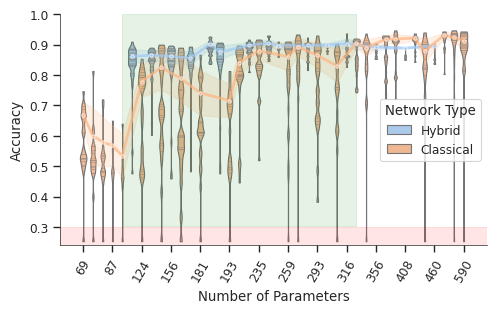

/tmp/ipykernel_9848/2132300527.py:71: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax1 = sns.violinplot(df_k8_stat[(df_k8_stat['num_params'] == q_nparams) | (df_k8_stat['num_params']== cl_nparams) | (df_k8_stat['num_params']==cl_nparams_large)],
/home/st4eve/miniforge3/envs/CVTrain/lib/python3.10/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


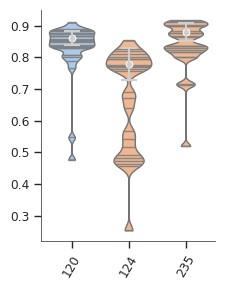

In [47]:
df_k8_stat = pd_last_epoch(df_kerr8)
df_k8_stat.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'num_params', 'acc'], inplace=True)
df_k8_stat['num_params'] = df_k8_stat['num_params'].apply(lambda x: x).astype(int)
df_k8_stat.loc[df_k8_stat['network_type']=='classical', 'cutoff'] = -1



n = 3
fig1 = plt.figure(figsize=(5.5,3))
ax1 = sns.violinplot(df_k8_stat, x='num_params', y='val_acc', hue='network_type', 
               hue_order=['quantum', 'classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, linewidth=0.8,
               palette=palette,
               density_norm='count', inner_kws={'color': 'grey', 'alpha':0.7})
sns.despine(offset=0)

df_k8_m_plot = copy.deepcopy(df_k8_stat)
try:
    df_k8_m_plot.drop(columns=['model', 'exp_folder'], inplace=True)
except:
    pass
df_k8_m_plot.drop(columns=['epoch'], inplace=True)
mean_accuracy = df_k8_m_plot.groupby(['num_params', 'network_type'])['val_acc'].transform('mean')
df_k8_m_plot = df_k8_m_plot[df_k8_m_plot['val_acc'] >= mean_accuracy]
df_k8_m_plot.sort_values('num_params', inplace=True)
df_k8_m_plot['index'] = pd.factorize(df_k8_m_plot['num_params'])[0]

index_dict = dict(zip(df_k8_m_plot['num_params'].unique(), df_k8_m_plot['index'].unique()))

sns.lineplot(df_k8_m_plot, x='index', y='val_acc', 
             #style='network_type', 
             hue='network_type',
             linewidth=2,
             marker='.',
             palette=palette,
             hue_order=['quantum', 'classical'],
             style_order=['quantum', 'classical'], 
             errorbar='sd',
             alpha=0.7,
             legend=None)

#plt.axhline(y=0.3, color='k', linestyle='--')
plt.axvspan(index_dict[120]-1, index_dict[316]+1, ymin=0.085, alpha=0.1, color='green')
plt.axhspan(0.0, 0.3, xmin=0.0, alpha=0.1, color='red')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of Parameters')
plt.ylim(0.24, 1.0)
ax1.legend_.set_title('Network Type')
handles, labels = ax1.get_legend_handles_labels()
labels = ['Hybrid', 'Classical']
ax1.legend(handles, labels, title='Network Type')

[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_major_ticks()) if i % n != 0]
plt.xticks(rotation=60)
plt.savefig('./figures/kerr_encoding_violinplot.svg')
plt.savefig('./figures/kerr_encoding_violinplot.png', dpi=300)
plt.show()

cl_nparams = 124
q_nparams = 120
cl_nparams_large = 235

fig= plt.figure(figsize=(2.25,3))

df_k8_temp_plot = copy.deepcopy(df_k8_stat)
df_k8_temp_plot = df_k8_temp_plot[(df_k8_temp_plot['num_params'] == q_nparams) | (df_k8_temp_plot['num_params']== cl_nparams) | (df_k8_temp_plot['num_params']==cl_nparams_large)]
mean_accuracy = df_k8_temp_plot.groupby(['num_params', 'network_type'])['val_acc'].transform('mean')
df_k8_temp_plot = df_k8_temp_plot[df_k8_temp_plot['val_acc'] >= mean_accuracy]
df_k8_temp_plot.sort_values('num_params', inplace=True)
df_k8_temp_plot['index'] = pd.factorize(df_k8_temp_plot['num_params'])[0]

ax1 = sns.violinplot(df_k8_stat[(df_k8_stat['num_params'] == q_nparams) | (df_k8_stat['num_params']== cl_nparams) | (df_k8_stat['num_params']==cl_nparams_large)], 
                x='num_params', y='val_acc', hue='network_type', legend=None, 
                hue_order=['quantum', 'classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, palette=palette,
                density_norm='count', inner_kws={'lw': 1, 'color': 'grey', 'alpha':0.9}, native_scale=False)

palette_temp = [palette[-3] for i in range(2)]
sns.lineplot(df_k8_temp_plot[(df_k8_temp_plot['num_params'] == q_nparams) | (df_k8_temp_plot['num_params']== cl_nparams) | (df_k8_temp_plot['num_params']==cl_nparams_large)],
             x='index', y='val_acc', hue='network_type', legend=None,
             hue_order=['quantum', 'classical'], alpha=1.0, marker='o', lw=0, err_style='bars', errorbar='sd', 
             err_kws={'capsize': 6, 'elinewidth': 1.5, 'capthick': 1.5}, palette=palette_temp)
# plt.axhspan(ymin=df_k8_m_plot[df_k8_m_plot['num_params']==q_nparams]['val_acc'].min(), 
#             ymax=df_k8_m_plot[df_k8_m_plot['num_params']==q_nparams]['val_acc'].max(), 
#             color=palette[0], alpha=0.2)
# plt.axhspan(ymin=df_k8_m_plot[df_k8_m_plot['num_params']==cl_nparams]['val_acc'].min(), 
#             ymax=df_k8_m_plot[df_k8_m_plot['num_params']==cl_nparams]['val_acc'].max(), 
#             color=palette[1], alpha=0.2)
# plt.axhspan(ymin=0, ymax=0.3, color='red', alpha=0.1)


for spine in ax1.spines.values():
    spine.set_visible(True)
    # spine.set_linestyle((0, (5, 5)))
index_dict = dict(zip(df_k8_m_plot['num_params'].unique(), df_k8_m_plot['index'].unique()))
# plt.ylim(0.24,1.0)
# plt.axhline(df_k8_stat_all_weights[df_k8_stat_all_weights['num_params']==q_nparams]['val_acc'].median(), color='k', alpha=0.5, lw=0.5)
# df_k8_temp = copy.deepcopy(df_k8_stat)
# df_k8_temp = df_k8_temp[df_k8_temp['num_params'] == cl_nparams]
# df_k8_temp = df_k8_temp[df_k8_temp['acc'] > df_k8_temp['acc'].mean()]
# plt.axhline(df_k8_temp.loc[358, 'val_acc'], color='k', alpha=0.5, lw=0.5)
sns.despine()
# plt.yticks([])
# plt.xticks([q_nparams,cl_nparams,cl_nparams_large],[q_nparams,cl_nparams, cl_nparams_large])
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('')
plt.savefig(f'./figures/kerr_encoding_violinplot_{q_nparams}_{cl_nparams}.png', bbox_inches='tight', dpi=300)
plt.show()

In [48]:
df_hybrid = df_k8_stat[df_k8_stat['network_type']=='quantum']
df_classical = df_k8_stat[df_k8_stat['network_type']=='classical']


print('Hybrid')
print('Num Trials: ', len(df_hybrid))
print(f'Num Failed: {len(df_hybrid[df_hybrid["val_acc"] < 0.3])}')
print(f'Percent Failed: {len(df_hybrid[df_hybrid["val_acc"] < 0.3])/len(df_hybrid)*100}')
print(f'STD Accuracy: {df_hybrid["val_acc"].std()}')
print(f'Mean of Top 50%', df_hybrid["val_acc"].nlargest(int(len(df_hybrid)/2)).mean())
print(f'Mean Accuracy: {df_hybrid["val_acc"].mean()}')
print(f'Probability of achieving 75th percentile', len(df_hybrid[df_hybrid['val_acc'] > 0.89])/len(df_hybrid))

df_hybrid_120 = df_hybrid[df_hybrid['num_params'] == 120]

print('\nHybrid 120 parameter network')
print(f'Mean Accuracy: {df_hybrid_120["val_acc"].mean()}')
print(f'Mean of Top 50% : {df_hybrid_120["val_acc"].nlargest(int(len(df_hybrid_120)/2)).mean()}')
print(f'Max Accuracy: {df_hybrid_120["val_acc"].max()}')
print(f'STD Accuracy: {df_hybrid_120["val_acc"].std()}')
print(f'STD on Top 50%: {df_hybrid_120["val_acc"].nlargest(int(len(df_hybrid_120)/2)).std()}')
print(f'Percent below 50% accuracy: {len(df_hybrid_120[df_hybrid_120["val_acc"] < 0.5])/len(df_hybrid_120)*100}')

print('\nClassical')
print('Num Trials: ', len(df_classical))
print(f'Num Failed: {len(df_classical[df_classical["val_acc"] < 0.3])}')
print(f'Percent Failed: {len(df_classical[df_classical["val_acc"] < 0.3])/len(df_classical)*100}')
print(f'STD Accuracy: {df_classical["val_acc"].std()}')

df_classical_124 = df_classical[df_classical['num_params'] == 124]
print('\nClassical 124 parameter network')
print(f'Mean Accuracy: {df_classical_124["val_acc"].mean()}')
print(f'Mean of Top 50% : {df_classical_124["val_acc"].nlargest(int(len(df_classical_124)/2)).mean()}')
print(f'Max Accuracy: {df_classical_124["val_acc"].max()}')
print(f'STD Accuracy: {df_classical_124["val_acc"].std()}')
print(f'STD on Top 50%: {df_classical_124["val_acc"].nlargest(int(len(df_classical_124)/2)).std()}')
print(f'Percent below 50% accuracy: {len(df_classical_124[df_classical_124["val_acc"] < 0.5])/len(df_classical_124)*100}')
print(f"Percent failed: {len(df_classical_124[df_classical_124['val_acc'] < 0.3])/len(df_classical_124)*100}")

classical_nparams = 235
df_classical_nparams = df_classical[df_classical['num_params'] == classical_nparams]
print(f'\nClassical {classical_nparams} parameter network')
print(f'Mean Accuracy: {df_classical_nparams["val_acc"].mean()}')
print(f'Mean of Top 50% : {df_classical_nparams["val_acc"].nlargest(int(len(df_classical_nparams)/2)).mean()}')
print(f'Max Accuracy: {df_classical_nparams["val_acc"].max()}')
print(f'STD Accuracy: {df_classical_nparams["val_acc"].std()}')
print(f'STD on Top 50%: {df_classical_nparams["val_acc"].nlargest(int(len(df_classical_nparams)/2)).std()}')



Hybrid
Num Trials:  314
Num Failed: 0
Percent Failed: 0.0
STD Accuracy: 0.07332701157591061
Mean of Top 50% 0.8930785488930477
Mean Accuracy: 0.8555520155057785
Probability of achieving 75th percentile 0.2484076433121019

Hybrid 120 parameter network
Mean Accuracy: 0.8256321847438812
Mean of Top 50% : 0.8752380992685046
Max Accuracy: 0.9100000262260437
STD Accuracy: 0.09359700601748584
STD on Top 50%: 0.01605089047385165
Percent below 50% accuracy: 3.4482758620689653

Classical
Num Trials:  518
Num Failed: 17
Percent Failed: 3.2818532818532815
STD Accuracy: 0.17626321382097176

Classical 124 parameter network
Mean Accuracy: 0.6576388875643412
Mean of Top 50% : 0.7947222193082174
Max Accuracy: 0.8533333539962769
STD Accuracy: 0.16305204711855725
STD on Top 50%: 0.028901035453284363
Percent below 50% accuracy: 25.0
Percent failed: 4.166666666666666

Classical 235 parameter network
Mean Accuracy: 0.8328985442285952
Mean of Top 50% : 0.891818182034926
Max Accuracy: 0.9166666865348816
STD A

Regular experiment cutoff maximum: 11
4 Qumode cutoff maximum: 5
2 Qumode high-cutoff maximum: 30


/tmp/ipykernel_9848/431068167.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(df_k8_m_plot, x='num_params', y='val_acc', hue='network_type', style='network_type', markers=True, dashes=False, palette=palette)


num_params values where quantum validation accuracy is greater: [120, 138, 156, 174, 184, 192, 217, 250, 252, 283, 304, 316, 356, 460]


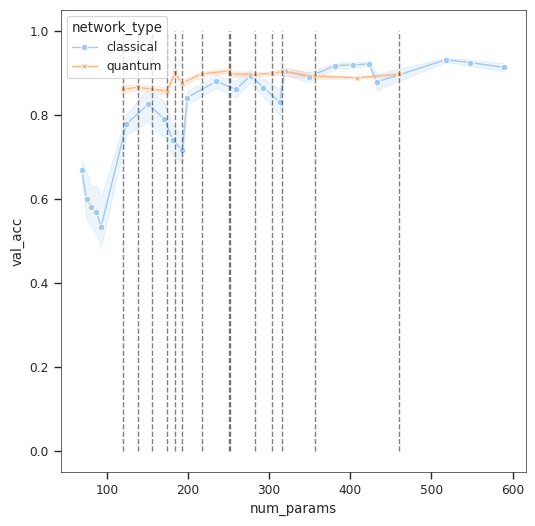

In [49]:
%matplotlib inline
print('Regular experiment cutoff maximum:', df_hybrid['cutoff'].max())
print('4 Qumode cutoff maximum:', df_hybrid[df_hybrid['num_qumodes']==4]['cutoff'].max())
print('2 Qumode high-cutoff maximum:', df_kerr8_high_cutoff['cutoff'].max())
plt.figure(figsize=(6,6))
sns.lineplot(df_k8_m_plot, x='num_params', y='val_acc', hue='network_type', style='network_type', markers=True, dashes=False, palette=palette)
df_k8_comparison = df_k8_m_plot.groupby(['num_params', 'network_type']).mean()
df_k8_comparison.reset_index(inplace=True)


df_k8_comparison_classical = df_k8_comparison[df_k8_comparison['network_type']=='classical']
df_k8_comparison_quantum = df_k8_comparison[df_k8_comparison['network_type']=='quantum']



# Function to find the closest num_params value in classical DataFrame for each quantum num_params
def find_closest_classical(quantum_num_params, classical_df):
    abs_diff = classical_df['num_params'].apply(lambda x: abs(x - quantum_num_params))
    closest_index = abs_diff.idxmin()
    return classical_df.loc[closest_index]

# Create an empty list to store num_params values where quantum val_acc is greater
better_quantum_params = []

# Iterate over each row in the quantum DataFrame
for index, quantum_row in df_k8_comparison_quantum.iterrows():
    # Find the closest classical counterpart
    closest_classical_row = find_closest_classical(quantum_row['num_params'], df_k8_comparison_classical)
    # Compare val_acc values
    if quantum_row['val_acc'] > closest_classical_row['val_acc']:
        # If quantum val_acc is greater, append the num_params value to the list
        better_quantum_params.append(quantum_row['num_params'])

print('num_params values where quantum validation accuracy is greater:', better_quantum_params)

plt.vlines(better_quantum_params, 0.0, 1.0, color='k', linestyle='--', alpha=0.5)

5
11


/tmp/ipykernel_9848/2758497702.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(df_cutoff_sweep, x='cutoff', y='val_acc', hue='num_qumodes', markers='x', palette=palette[6:])


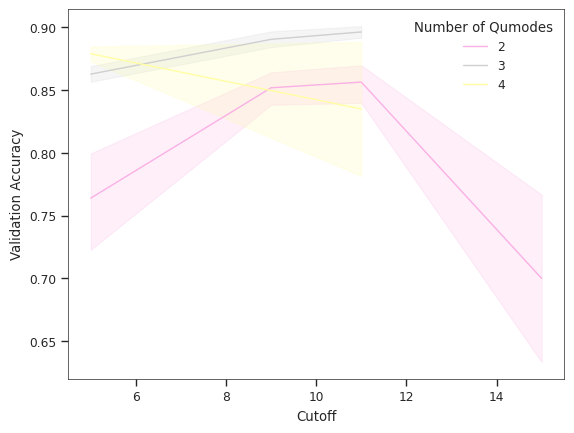

In [50]:
df_high_cutoff = pd_last_epoch(df_kerr8_high_cutoff)

print(df_hybrid[df_hybrid['num_qumodes']==4]['cutoff'].max())
print(df_high_cutoff[df_high_cutoff['num_qumodes']==4]['cutoff'].max())

df_cutoff_sweep = pd.concat([df_hybrid, df_high_cutoff], ignore_index=True)
df_cutoff_sweep = df_cutoff_sweep[df_cutoff_sweep['cutoff'] <= 15]

sns.lineplot(df_cutoff_sweep, x='cutoff', y='val_acc', hue='num_qumodes', markers='x', palette=palette[6:])
plt.xlabel('Cutoff')
plt.ylabel('Validation Accuracy')
plt.legend(title='Number of Qumodes', frameon=False)
plt.savefig('./figures/cutoff_sweep.pdf', bbox_inches='tight')

/tmp/ipykernel_9848/1357642723.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax1 = sns.violinplot(df_k8_stat, x='num_params', y='val_acc', hue='network_type',
/tmp/ipykernel_9848/1357642723.py:43: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(df_k8_m_plot, x='index', y='val_acc',


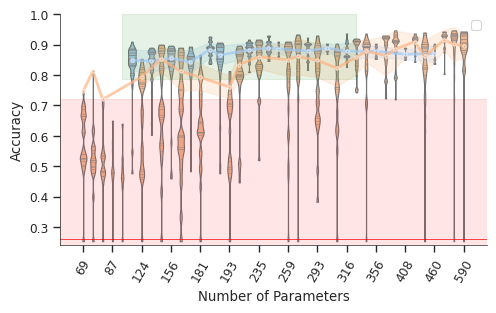

/tmp/ipykernel_9848/1357642723.py:94: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax1 = sns.violinplot(df_k8_stat[(df_k8_stat['num_params'] == q_nparams) | (df_k8_stat['num_params']== cl_nparams)],
/home/st4eve/miniforge3/envs/CVTrain/lib/python3.10/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/st4eve/miniforge3/envs/CVTrain/lib/python3.10/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


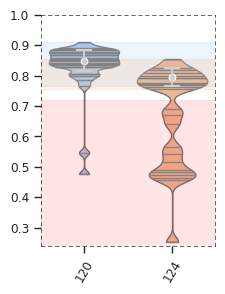

In [51]:
df_k8_stat = pd_last_epoch(df_kerr8)
df_k8_stat.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'num_params', 'acc'], inplace=True)
df_k8_stat['num_params'] = df_k8_stat['num_params'].apply(lambda x: x).astype(int)
df_k8_stat.loc[df_k8_stat['network_type']=='classical', 'cutoff'] = -1



n = 3
fig1 = plt.figure(figsize=(5.5,3))
ax1 = sns.violinplot(df_k8_stat, x='num_params', y='val_acc', hue='network_type', 
               hue_order=['quantum', 'classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, linewidth=0.8,
               palette=palette,
               density_norm='count', inner_kws={'color': 'grey', 'alpha':0.7})
sns.despine(offset=0)


mean_accuracy = 0.72
df_k8_stat['failed'] = df_k8_stat['val_acc'] < mean_accuracy


df_k8_stat.reset_index(inplace=True)


df_k8_m_plot = copy.deepcopy(df_k8_stat)
try:
    df_k8_m_plot.drop(columns=['model', 'exp_folder'], inplace=True)
except:
    pass
df_k8_m_plot.drop(columns=['epoch'], inplace=True)
df_k8_m_plot.sort_values('num_params', inplace=True)
df_k8_m_plot['index'] = pd.factorize(df_k8_m_plot['num_params'])[0]

df_k8_m_failed = copy.deepcopy(df_k8_m_plot)

df_k8_m_plot = df_k8_m_plot[df_k8_m_plot['val_acc'] >= mean_accuracy]
index_dict = dict(zip(df_k8_m_plot['num_params'].unique(), df_k8_m_plot['index'].unique()))

df_k8_m_failed['n_failed'] = df_k8_stat.groupby(['num_params', 'network_type'])['failed'].transform('sum')
df_k8_m_failed['percent_failed'] = df_k8_m_failed['n_failed']/df_k8_stat.groupby(['num_params', 'network_type'])['failed'].transform('count') * 100



sns.lineplot(df_k8_m_plot, x='index', y='val_acc', 
             #style='network_type', 
             hue='network_type',
             linewidth=2,
             marker='.',
             palette=palette,
             hue_order=['quantum', 'classical'],
             style_order=['quantum', 'classical'], 
             errorbar='sd',
             alpha=0.7,
             legend=None)

#plt.axhline(y=0.3, color='k', linestyle='--')
plt.axvspan(index_dict[120]-1, index_dict[316]+1, ymin=mean_accuracy, alpha=0.1, color='green')
plt.axhspan(0.0, mean_accuracy, xmin=0.0, alpha=0.1, color='red')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of Parameters')
plt.ylim(0.24, 1.0)
ax1.legend_.set_title('Network Type')
handles, labels = ax1.get_legend_handles_labels()
labels = ['Hybrid', 'Classical']
ax1.legend(handles, labels, title='Network Type')

plt.axhline(y=0.26, color='r', linestyle='-', lw=0.5)

[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_major_ticks()) if i % n != 0]
plt.xticks(rotation=60)
ax1.legend([])

plt.savefig('./figures/kerr_encoding_violinplot_v2.svg', bbox_inches='tight')

plt.show()

cl_nparams = 124
q_nparams = 120
cl_nparams_large = 235

fig= plt.figure(figsize=(2.25,3))

df_k8_temp_plot = copy.deepcopy(df_k8_stat)
df_k8_temp_plot = df_k8_temp_plot[(df_k8_temp_plot['num_params'] == q_nparams) | (df_k8_temp_plot['num_params']== cl_nparams) | (df_k8_temp_plot['num_params']==cl_nparams_large)]
mean_accuracy = mean_accuracy
df_k8_temp_plot = df_k8_temp_plot[df_k8_temp_plot['val_acc'] >= mean_accuracy]
df_k8_temp_plot.sort_values('num_params', inplace=True)
df_k8_temp_plot['index'] = pd.factorize(df_k8_temp_plot['num_params'])[0]

# ax1 = sns.violinplot(df_k8_stat[(df_k8_stat['num_params'] == q_nparams) | (df_k8_stat['num_params']== cl_nparams) | (df_k8_stat['num_params']==cl_nparams_large)], 
#                 x='num_params', y='val_acc', hue='network_type', legend=None, 
#                 hue_order=['quantum', 'classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, palette=palette,
#                 density_norm='count', inner_kws={'lw': 1, 'color': 'grey', 'alpha':0.9}, native_scale=False)

ax1 = sns.violinplot(df_k8_stat[(df_k8_stat['num_params'] == q_nparams) | (df_k8_stat['num_params']== cl_nparams)], 
                x='num_params', y='val_acc', hue='network_type', legend=None, 
                hue_order=['quantum', 'classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, palette=palette,
                density_norm='count', inner_kws={'lw': 1, 'color': 'grey', 'alpha':0.9}, native_scale=False)


palette_temp = [palette[-3] for i in range(2)]
# sns.lineplot(df_k8_temp_plot[(df_k8_temp_plot['num_params'] == q_nparams) | (df_k8_temp_plot['num_params']== cl_nparams) | (df_k8_temp_plot['num_params']==cl_nparams_large)],
#              x='index', y='val_acc', hue='network_type', legend=None,
#              hue_order=['quantum', 'classical'], alpha=1.0, marker='o', lw=0, err_style='bars', errorbar='sd', 
#              err_kws={'capsize': 6, 'elinewidth': 1.5, 'capthick': 1.5}, palette=palette_temp)
sns.lineplot(df_k8_temp_plot[(df_k8_temp_plot['num_params'] == q_nparams) | (df_k8_temp_plot['num_params']== cl_nparams)],
             x='index', y='val_acc', hue='network_type', legend=None,
             hue_order=['quantum', 'classical'], alpha=1.0, marker='o', lw=0, err_style='bars', errorbar='sd', 
             err_kws={'capsize': 6, 'elinewidth': 1.5, 'capthick': 1.5}, palette=palette_temp)



plt.axhspan(ymin=df_k8_m_plot[df_k8_m_plot['num_params']==q_nparams]['val_acc'].min(), 
            ymax=df_k8_m_plot[df_k8_m_plot['num_params']==q_nparams]['val_acc'].max(), 
            color=palette[0], alpha=0.2)
plt.axhspan(ymin=df_k8_m_plot[df_k8_m_plot['num_params']==cl_nparams]['val_acc'].min(), 
            ymax=df_k8_m_plot[df_k8_m_plot['num_params']==cl_nparams]['val_acc'].max(), 
            color=palette[1], alpha=0.2)
plt.axhspan(ymin=0.0, ymax=0.72, color='red', alpha=0.1)


for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linestyle((0, (5, 5)))
index_dict = dict(zip(df_k8_m_plot['num_params'].unique(), df_k8_m_plot['index'].unique()))
plt.ylim(0.24,1.0)
# plt.axhline(df_k8_stat_all_weights[df_k8_stat_all_weights['num_params']==q_nparams]['val_acc'].median(), color='k', alpha=0.5, lw=0.5)
# df_k8_temp = copy.deepcopy(df_k8_stat)
# df_k8_temp = df_k8_temp[df_k8_temp['num_params'] == cl_nparams]
# df_k8_temp = df_k8_temp[df_k8_temp['acc'] > df_k8_temp['acc'].mean()]
# plt.axhline(df_k8_temp.loc[358, 'val_acc'], color='k', alpha=0.5, lw=0.5)
# plt.yticks([])
# plt.xticks([q_nparams,cl_nparams,cl_nparams_large],[q_nparams,cl_nparams, cl_nparams_large])
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('')

plt.savefig(f'./figures/kerr_encoding_violinplot_{q_nparams}_{cl_nparams}_v2.svg', bbox_inches='tight')

plt.show()

/tmp/ipykernel_9848/3832326622.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax1 = sns.barplot(df_k8_m_failed, x='num_params', y='percent_failed', hue='network_type', hue_order=['quantum', 'classical'], palette=palette)


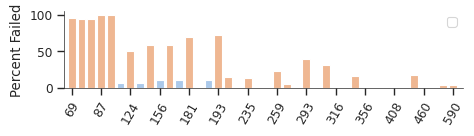

[174 156 192 120 138 184 316 217 283 250 304 356 408 252 460 124 151 518
 548 293 349 403 433  75 313  93 235 171 199 590  69 259  81 319 181 423
 193 381 277  87]


In [52]:
n = 3
fig1 = plt.figure(figsize=(5.14,1.0))


ax1 = sns.barplot(df_k8_m_failed, x='num_params', y='percent_failed', hue='network_type', hue_order=['quantum', 'classical'], palette=palette)


sns.despine(offset=0)
plt.xlabel('')
plt.xticks(rotation=60)
plt.xlim([-0.75, 40])
plt.ylabel('Percent Failed')
plt.legend([])

n = 3

for (i,l) in enumerate(ax1.xaxis.get_major_ticks()):
    if i % n != 0:
        l.set_visible(False)

plt.savefig('./figures/failed_trials_barplot.svg', bbox_inches='tight')

plt.show()

print(df_k8_stat['num_params'].unique())

In [76]:
df_hybrid = df_k8_stat[df_k8_stat['network_type']=='quantum']
df_classical = df_k8_stat[df_k8_stat['network_type']=='classical']


print('Hybrid')
print('Num Trials: ', len(df_hybrid))
print(f'Num Failed: {len(df_hybrid[df_hybrid["val_acc"] < 0.3])}')
print(f'Percent Failed: {len(df_hybrid[df_hybrid["val_acc"] < 0.3])/len(df_hybrid)*100}')
print(f'Percent below linear fitting accuracy: {len(df_hybrid[df_hybrid["val_acc"] < mean_accuracy])/len(df_hybrid)*100}')
print(f'STD Accuracy: {df_hybrid["val_acc"].std()}')

df_hybrid_120 = df_hybrid[df_hybrid['num_params'] == 120]
pd.to_pickle(df_hybrid_120, './dataframes/df_hybrid_120.pkl', compression='xz')

print('\nHybrid 120 parameter network')
print(f'Mean Accuracy: {df_hybrid_120["val_acc"].mean()}')
print(f'Max Accuracy: {df_hybrid_120["val_acc"].max()}')
print(f'STD Accuracy: {df_hybrid_120["val_acc"].std()}')
print(f'Mean greater than linear fitting: {df_hybrid_120[df_hybrid_120["val_acc"] > mean_accuracy]["val_acc"].mean()}')
print(f'STD on greater than linear fitting: {df_hybrid_120[df_hybrid_120["val_acc"] > mean_accuracy]["val_acc"].std()}')
print(f'Percent below linear fitting accuracy: {len(df_hybrid_120[df_hybrid_120["val_acc"] < mean_accuracy])/len(df_hybrid_120)*100}')

print('\nClassical')
print('Num Trials: ', len(df_classical))
print(f'Num Failed: {len(df_classical[df_classical["val_acc"] < 0.3])}')
print(f'Percent Failed: {len(df_classical[df_classical["val_acc"] < 0.3])/len(df_classical)*100}')
print(f'STD Accuracy: {df_classical["val_acc"].std()}')


print(f'Percent below linear fitting accuracy: {len(df_classical[df_classical["val_acc"] < mean_accuracy])/len(df_classical)*100}')

df_classical_124 = df_classical[df_classical['num_params'] == 124]
print('\nClassical 124 parameter network')
print(f'Mean Accuracy: {df_classical_124["val_acc"].mean()}')
print(f'Max Accuracy: {df_classical_124["val_acc"].max()}')
print(f'STD Accuracy: {df_classical_124["val_acc"].std()}')
print(f"Percent failed: {len(df_classical_124[df_classical_124['val_acc'] < 0.3])/len(df_classical_124)*100}")
print(f'Mean greater than linear fitting: {df_classical_124[df_classical_124["val_acc"] > mean_accuracy]["val_acc"].mean()}')
print(f'STD on greater than linear fitting: {df_classical_124[df_classical_124["val_acc"] > mean_accuracy]["val_acc"].std()}')
print(f'Percent below linear fitting accuracy: {len(df_classical_124[df_classical_124["val_acc"] < mean_accuracy])/len(df_classical_124)*100}')

classical_nparams = 235
df_classical_nparams = df_classical[df_classical['num_params'] == classical_nparams]
print(f'\nClassical {classical_nparams} parameter network')
print(f'Mean Accuracy: {df_classical_nparams["val_acc"].mean()}')
print(f'Max Accuracy: {df_classical_nparams["val_acc"].max()}')
print(f'STD Accuracy: {df_classical_nparams["val_acc"].std()}')
print(f"Percent failed: {len(df_classical_nparams[df_classical_nparams['val_acc'] < 0.3])/len(df_classical_nparams)*100}")
print(f'Mean greater than linear fitting: {df_classical_nparams[df_classical_nparams["val_acc"] > mean_accuracy]["val_acc"].mean()}')
print(f'STD on greater than linear fitting: {df_classical_nparams[df_classical_nparams["val_acc"] > mean_accuracy]["val_acc"].std()}')
print(f'Percent below linear fitting accuracy: {len(df_classical_nparams[df_classical_nparams["val_acc"] < mean_accuracy])/len(df_classical_nparams)*100}')



Hybrid
Num Trials:  314
Num Failed: 0
Percent Failed: 0.0
Percent below linear fitting accuracy: 4.140127388535031
STD Accuracy: 0.07332701157591061

Hybrid 120 parameter network
Mean Accuracy: 0.8256321847438812
Max Accuracy: 0.9100000262260437
STD Accuracy: 0.09359700601748584
Mean greater than linear fitting: 0.8488888895070111
STD on greater than linear fitting: 0.034579279322883044
Percent below linear fitting accuracy: 6.896551724137931

Classical
Num Trials:  518
Num Failed: 17
Percent Failed: 3.2818532818532815
STD Accuracy: 0.17626321382097176
Percent below linear fitting accuracy: 33.78378378378378

Classical 124 parameter network
Mean Accuracy: 0.6576388875643412
Max Accuracy: 0.8533333539962769
STD Accuracy: 0.16305204711855725
Percent failed: 4.166666666666666
Mean greater than linear fitting: 0.7947222193082174
STD on greater than linear fitting: 0.028901035453284367
Percent below linear fitting accuracy: 50.0

Classical 235 parameter network
Mean Accuracy: 0.832898544228

/tmp/ipykernel_9848/3303149420.py:26: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(df_hybrid_120,


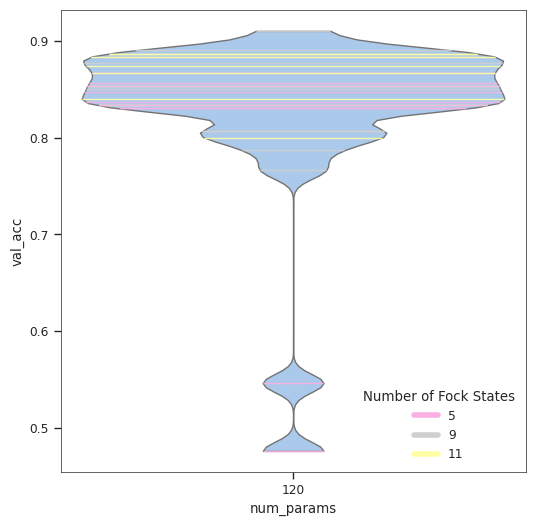

# Generate timing plots

In [54]:
# from common_packages.calc_time import calc_time, generate_time_database, calc_time_per_epoch, find_max_time
# import seaborn as sns
# def generate_time_df(ex_path):
#     time_data = generate_time_database(ex_path) 
#     df_time = pd.DataFrame(columns=time_data[1]['config'].keys())
#     df_time['time'] = np.nan
#     df_time.pop('__doc__')
#     for exp, val in time_data.items():
#         config = val['config']
#         config.pop('__doc__', None)
#         if config['iteration'] != -1:
#             time = val['time']
#             df_time.loc[exp] = [*config.values(), time] 
#     df_time.pop('iteration')
#     df_time.loc[df_time['network_type']=='classical', 'cutoff'] = 0
#     df_time['time'] = df_time['time'] / np.timedelta64(1,'h')
#     df_time_mean = df_time.groupby(['network_type', 'n_layers', 'num_qumodes', 'cutoff']).mean()
#     df_time_mean.reset_index(inplace=True)
#     display(df_time.head())
#     # display(df_time_mean.head())
#     display(df_time.describe())
#     display(df_time_mean.describe())
#     return df_time, df_time_mean

# df_time_orig, df_time_mean_orig = generate_time_df('/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment_cutoff_sweep')
# df_time_kerr, df_time_mean_kerr = generate_time_df('/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Kerr')

# def plot_time_violin(df, fname='time_violin'):
#     sns.violinplot(df[df['network_type']=='quantum'], x='n_layers', hue='num_qumodes', y='time', bw=0.4, cut=True)
#     plt.show()
#     sns.violinplot(df[df['network_type']=='quantum'], hue='num_qumodes', x='cutoff', y='time', bw=0.4, cut=True)
#     plt.show()
#     sns.scatterplot(df[df['network_type']=='classical'], hue='num_qumodes', x='n_layers', y='time')
#     plt.show()
#     print('Correlation Matrix')
#     display(df.corr())

# plot_time_violin(df_time_mean_orig, 'time_violin_orig')
# plot_time_violin(df_time_mean_kerr, 'time_violin_kerr')
# print(df_o['num_exps'].describe())
# sns.histplot(df_o, x='num_exps', hue='network_type')
# sns.displot(df_time_mean_orig[df_time_mean_orig['network_type']=='quantum'], x='time', hue='num_qumodes', kind='kde', cut=0, fill=True)
# sns.displot(df_time_mean_kerr[df_time_mean_kerr['network_type']=='quantum'], x='time', hue='num_qumodes', kind='kde', cut=0, fill=True)

In [55]:
import numpy as np
from quantum_base import Net as Net_orig
from quantum_base import OPTIMIZER, LOSS_FUNCTION
from quantum_base_kerr import Net as Net_kerr
from data import generate_synthetic_dataset_easy
import seaborn as sns
from itertools import product
test_data, validate_data = generate_synthetic_dataset_easy(num_datapoints=1000, n_features=8, n_classes=4)


df_orig['model'] = Net_orig
df_orig['exp_folder'] = '/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment_cutoff_sweep/'
df_kerr8['model'] = Net_kerr
df_kerr8['exp_folder'] = ex_path_kerr8 + '/'
def plot_network_certainty_dist(df, metric='acc', fname='network_certainty_dist', validate_data=validate_data):  
    df_final = copy.deepcopy(df)
    df_final[metric] = df[metric].apply(lambda x: x[-1])
    df_quantum = df_final[df_final['network_type']=='quantum']
    df_quantum = df_quantum[df_quantum['num_qumodes']==2]
    df_classical = df_final[df_final['network_type']=='classical']

    exp_folder = df_quantum['exp_folder'].unique()[0]
 
    for n in df_quantum['num_qumodes'].unique():
        for c in df_quantum[df_quantum['num_qumodes']==n]['cutoff'].unique():
            for nl in df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c)]['n_layers'].unique():
                exp_quantum = df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c) & (df_quantum['n_layers']==nl)][metric]
                exp_classical = df_classical.loc[(df_classical['num_qumodes']==n) & (df_classical['n_layers']==nl)][metric]
                if len(exp_quantum) == 0 or len(exp_classical) == 0:
                    continue
                else:
                    exp_quantum = exp_quantum.idxmax()
                    exp_classical = exp_classical.idxmax()
                    print('For Number of Qumodes: ', n, ' Cutoff: ', c, ' Layers: ', nl)
                    print(f'Highest Accuracy Experiments\nQuantum: {exp_quantum} \nClassical: {exp_classical}')
                    print(f'Val Acc Quantum: {df_quantum.loc[exp_quantum, "val_acc"][-1]}')
                    model = df_final['model'][exp_quantum](
                        network_type='quantum',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=c,
                        max_initial_weight=0.15
                    )
                    model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_quantum = model(validate_data[0][0:1])
                    try:
                        model.load_weights(f'{exp_folder}{exp_quantum}/weights/weight99.ckpt', by_name=False).expect_partial()
                    except:
                        model.load_weights(f'{exp_folder}{exp_quantum}/weights/weight.99.ckpt', by_name=False).expect_partial()
                    output_quantum = model(validate_data[0])

                    #loss_quantum, acc_quantum = model.evaluate(validate_data[0], validate_data[1])

                    model_classical = df_final['model'][exp_classical](
                        network_type='classical',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=1,
                        max_initial_weight=0.15
                    )

                    model_classical.load_weights(f'{exp_folder}{exp_classical}/weights/weight99.ckpt', by_name=False).expect_partial()
                    model_classical.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_classical = model_classical(validate_data[0])

                    #loss_classical, acc_classical = model_classical.evaluate(validate_data[0], validate_data[1])
                    
                    plot_df = pd.DataFrame(columns=['Quantum', 'Classical'])
                    plot_df['Quantum']=np.max(output_quantum, axis=1)
                    plot_df['Classical']=np.max(output_classical, axis=1)

                    print(f'Average Maximum Output Probability\nQuantum: {np.mean(np.max(output_quantum, axis=1))}\nClassical: {np.mean(np.max(output_classical, axis=1))}')
                    sns.displot(plot_df)
                    plt.xlabel(f'Maximum Output Probability')
                    plt.title(f'Certainty Distribution\n{metric.capitalize()} {n} Qumodes {c} Cutoff {nl} Layers')
                    plt.show()


# plot_network_certainty_dist(df_kerr8[(df_kerr8['num_qumodes']==2) & (df_kerr8['n_layers']==1) & ( (df_kerr8['cutoff']==5) | (df_kerr8['cutoff']=='classical') )], validate_data=validate_data)

In [56]:
plot_network_certainty_dist(df_orig, validate_data=validate_data, metric='acc')

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,class
0,3.298863,2.381539,-1.205030,6.605331,2.113865,4.691736,3.900598,-2.447516,3
1,-1.872740,-1.655000,0.085481,3.598689,-2.387423,-6.949945,3.784349,1.492308,1
2,6.935569,-0.177929,2.256126,-5.588208,4.427367,5.075146,-3.620722,-1.539120,3
3,-5.382906,-1.133503,4.566957,5.206033,-4.497660,-6.731853,0.433409,4.236264,1
4,2.684470,3.886234,3.923193,-2.050238,-0.871740,-0.343404,3.408071,-3.257353,2


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,class
feature 1,1.000000,0.117481,-0.424462,-0.419638,0.000040,0.278215,0.423869,-0.479970,-0.138790
feature 2,0.117481,1.000000,0.328440,0.261661,0.124705,0.151272,-0.044040,-0.240802,-0.112911
feature 3,-0.424462,0.328440,1.000000,0.349037,0.102656,-0.181656,-0.337930,0.151171,-0.018838
feature 4,-0.419638,0.261661,0.349037,1.000000,0.107459,0.068298,-0.039066,0.320556,-0.143571
feature 5,0.000040,0.124705,0.102656,0.107459,1.000000,0.269996,-0.139325,-0.219774,0.073145
feature 6,0.278215,0.151272,-0.181656,0.068298,0.269996,1.000000,-0.093505,0.085975,0.196382
feature 7,0.423869,-0.044040,-0.337930,-0.039066,-0.139325,-0.093505,1.000000,-0.266368,-0.377516
feature 8,-0.479970,-0.240802,0.151171,0.320556,-0.219774,0.085975,-0.266368,1.000000,0.144904
class,-0.138790,-0.112911,-0.018838,-0.143571,0.073145,0.196382,-0.377516,0.144904,1.000000


/tmp/ipykernel_9848/3426362623.py:58: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.scatterplot(df_data, x='feature 1', y='feature 6', hue='class', palette=palette_temp, s=3.0, ax=ax)
/tmp/ipykernel_9848/3426362623.py:58: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.scatterplot(df_data, x='feature 1', y='feature 6', hue='class', palette=palette_temp, s=3.0, ax=ax)
/tmp/ipykernel_9848/3426362623.py:58: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.scatterplot(df_data, x='feature 1', y='feature 6', hue='class', palette=palette_temp, s=3.0, ax=ax)
/tmp/ipykernel_9848/3426362623.py:58: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.scatterplot(df_data, x='feature 1', y='feature 6', hue='class', palette=palette_temp, s=3.0, ax=ax)


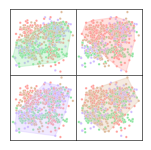

In [57]:
import numpy as np
from quantum_base_kerr import OPTIMIZER, LOSS_FUNCTION
from quantum_base_kerr import Net as Net_kerr
from data import generate_synthetic_dataset_easy_raw, generate_synthetic_dataset_easy
import seaborn as sns
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
from itertools import product
import fnmatch
import os
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

train_data, validate_data = generate_synthetic_dataset_easy_raw(num_datapoints=1000, n_features=8, n_classes=4)
x_train, y_train = train_data
x_val, y_val = validate_data

columns = [f'feature {i+1}' for i in range(8)] + ['class']
df_data = pd.DataFrame(columns=columns)
df_data['class'] = y_train + 1
df_data[columns[:-1]] = x_train

display(df_data.head())
display(df_data.corr())

palette_temp = palette[2:8]

# sns.pairplot(df_data, hue='class', palette=palette_temp, kind='scatter')
# plt.show()
# df_data_fake = pd.DataFrame(columns=['feature 1', 'feature 2', 'class'])
# cluster1 = np.random.multivariate_normal([-1,-1], [[0.2,0],[0,0.2]], 1000)
# cluster2 = np.random.multivariate_normal([1,1], [[0.2,0],[0,0.2]], 1000)
# cluster3 = np.random.multivariate_normal([-1,1], [[0.2,0],[0,0.2]], 1000)
# cluster4 = np.random.multivariate_normal([1,-1], [[0.2,0],[0,0.2]], 1000)

# df_data_fake['feature 1'] = np.concatenate([cluster1[:,0], cluster2[:,0], cluster3[:,0], cluster4[:,0]])
# df_data_fake['feature 2'] = np.concatenate([cluster1[:,1], cluster2[:,1], cluster3[:,1], cluster4[:,1]])
# df_data_fake['class'] = np.concatenate([np.ones(1000), np.ones(1000)*2, np.ones(1000)*3, np.ones(1000)*4])
# df_data_fake['class'] = df_data_fake['class'].apply(int)
# fig = plt.figure(figsize=(1.3,1.3))
# ax1 = sns.scatterplot(df_data_fake, x='feature 1', y='feature 2', hue='class', palette=palette_temp, s=3.0)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1.08))
# plt.savefig('./figures/sample_data.svg', dpi=300, bbox_inches='tight')
# plt.show()


fig, axs = plt.subplots(2,2, figsize=(1.7,1.7), sharex=True, sharey=True)
axs = axs.flatten()
for i,ax in enumerate(axs):
    ax = sns.scatterplot(df_data, x='feature 1', y='feature 6', hue='class', palette=palette_temp, s=3.0, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    encircle(df_data[df_data['class']==i+1]['feature 1'], df_data[df_data['class']==i+1]['feature 6'], ax=ax, fc=palette_temp[i], ec=palette_temp[i], alpha=0.3)
plt.subplots_adjust(wspace=0, hspace=0)
#sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1.08))
plt.savefig('./figures/real_data.svg', dpi=300, bbox_inches='tight')

In [59]:
df_kerr8['model'] = Net_kerr
df_kerr8['exp_folder'] = ex_path_kerr8 + '/' 
df_kerr8_all_weights['model'] = Net_kerr
df_kerr8_all_weights['exp_folder'] = ex_path_kerr8_all_weights + '/'
df_kerr8_all_weights.loc[df_kerr8_all_weights['network_type']=='classical', 'exp_folder'] = ex_path_kerr8_classical + '/'

df_kerr8.loc[df_kerr8['network_type']=='classical', 'exp_folder'] = ex_path_kerr8_classical + '/'

OPTIMIZER = tf.keras.optimizers.legacy.Adam()


pd.to_pickle(df_kerr8, './dataframes/df_kerr8_with_model.pkl', compression='xz')

from quantum_base_kerr import train_data, test_data
validate_data = test_data
def plot_network_output_dist(df, metric='acc', fname='network_certainty_dist', validate_data=validate_data, epoch=99):  
    df_final = copy.deepcopy(df)
    df_final[metric] = df[metric].apply(lambda x: x[-1])
    df_quantum = df_final[df_final['network_type']=='quantum']
    df_quantum = df_quantum[df_quantum['num_qumodes']==2]
    df_classical = df_final[df_final['network_type']=='classical']
    df_classical = df_classical[df_classical['num_qumodes']==2]

    
    plot_df = pd.DataFrame(columns=df_final.columns)
    plot_df.drop(columns=['acc', 'val_acc', 'loss', 'val_loss'], inplace=True)
    plot_df['1'] = np.nan
    plot_df['2'] = np.nan
    plot_df['3'] = np.nan
    plot_df['4'] = np.nan
    plot_df['pred_class'] = np.nan 
    plot_df['pred_value'] = np.nan
    plot_df['true_class'] = np.nan
    plot_df['exp_num'] = np.nan 
    plot_df['sample_num'] = np.nan
    for n in df_quantum['num_qumodes'].unique():
        for c in df_quantum[df_quantum['num_qumodes']==n]['cutoff'].unique():
            for nl in df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c)]['n_layers'].unique():
                exp_quantum = df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c) & (df_quantum['n_layers']==nl)]
                exp_classical = df_classical.loc[(df_classical['num_qumodes']==n) & (df_classical['n_layers']==nl)]
                if (len(exp_quantum) == 0) or (len(exp_classical) == 0):
                    print('No network found')
                    continue
                else:
                    exp_quantum = exp_quantum[metric].idxmax()
                    exp_classical = exp_classical[metric].idxmax()
                    print('For Number of Qumodes: ', n, ' Cutoff: ', int(c), ' Layers: ', nl)
                    print(f'Max Accuracy Experiments\nQuantum: {exp_quantum}\nClassical: {exp_classical}')
                    print(f'Quantum Val Acc, Loss: {df_quantum.loc[exp_quantum, "val_acc"][-1]}, {df_quantum.loc[exp_quantum, "loss"][-1]}')
                    print(f'Classical Val Acc, Loss: {df_classical.loc[exp_classical, "val_acc"][-1]}, {df_classical.loc[exp_classical, "loss"][-1]}')
                    model = df_quantum['model'][exp_quantum](
                        network_type='quantum',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=int(c),
                        max_initial_weight=0.5,
                        input_nl=None
                    )

                    model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_quantum = model(validate_data[0][0:1])

                    
                    try:
                        model.load_weights(f'{df_quantum["exp_folder"][exp_quantum]}{exp_quantum}/weights/weight.{epoch}.ckpt', by_name=False).expect_partial()
                    except:
                        model.load_weights(f'{df_quantum["exp_folder"][exp_quantum]}{exp_quantum}/weights/weight{epoch}.ckpt', by_name=False).expect_partial()
                    
                    output_quantum = np.array(model(validate_data[0]))
                    
                    model.evaluate(validate_data[0], validate_data[1])
                     
                    plot_dict = copy.deepcopy(df_quantum.loc[exp_quantum])
                    plot_dict.drop(['acc', 'val_acc', 'loss', 'val_loss', 'epoch'], inplace=True)
                    for i, (val, true_class) in enumerate(zip(output_quantum, np.argmax(validate_data[1], axis=1))):
                        plot_dict['1'] = val[0]
                        plot_dict['2'] = val[1]
                        plot_dict['3'] = val[2]
                        plot_dict['4'] = val[3]
                        plot_dict['true_class'] = true_class + 1
                        plot_dict['pred_class'] = np.argmax(val) + 1
                        plot_dict['pred_value'] = np.max(val)
                        plot_dict['exp_num'] = exp_quantum
                        plot_dict['sample_num'] = i
                        plot_df.loc[i] = plot_dict
                     
            
                    model_classical = df_classical['model'][exp_classical](
                        network_type='classical',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=-1,
                        max_initial_weight=0.5,
                        input_nl='relu'
                    )
                    try:
                        model_classical.load_weights(f'{df_classical["exp_folder"][exp_classical]}{exp_classical}/weights/weight.{epoch}.ckpt', by_name=False).expect_partial()
                    except:
                        model_classical.load_weights(f'{df_classical["exp_folder"][exp_classical]}{exp_classical}/weights/weight{epoch}.ckpt', by_name=False).expect_partial()
                    model_classical.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_classical = np.array(model_classical(validate_data[0]))

                    model_classical.evaluate(validate_data[0], validate_data[1])
                    
                    plot_dict = copy.deepcopy(df_classical.loc[exp_classical])
                    plot_dict.drop(['acc', 'val_acc', 'loss', 'val_loss', 'epoch'], inplace=True)
                    shift = plot_df['sample_num'].max() + 1
                    for i, (val, true_class) in enumerate(zip(output_classical, np.argmax(validate_data[1], axis=1))):
                        plot_dict['1'] = val[0]
                        plot_dict['2'] = val[1]
                        plot_dict['3'] = val[2]
                        plot_dict['4'] = val[3]
                        plot_dict['pred_class'] = np.argmax(val) + 1
                        plot_dict['pred_value'] = np.max(val)
                        plot_dict['true_class'] = true_class + 1
                        plot_dict['exp_num'] = exp_classical
                        plot_dict['sample_num'] = i
                        plot_df.loc[i+shift] = plot_dict

    return plot_df        

#plot_df_kerr = plot_network_output_dist(df_kerr8[(df_kerr8['n_layers']==1) & ( (df_kerr8['cutoff']==9) | (df_kerr8['cutoff']==-1))], validate_data=validate_data)
df_kerr8_all = df_kerr8_all_weights


epoch_before = 5
epoch_after = 195
# df_kerr8_all = df_kerr8_all_weights.loc[[358, 1]]
pd.to_pickle(df_kerr8_all, './dataframes/df_kerr8_all_weights.pkl', compression='xz')
pd.to_pickle(df_kerr8, './dataframes/df_kerr8.pkl', compression='xz')
display(df_kerr8_all)
display(df_kerr8)
# before_train_plot_df_kerr = plot_network_output_dist(df_kerr8_all[((df_kerr8_all['num_params'] == 120.0) | (df_kerr8_all['num_params']==124.0)) & ( (df_kerr8_all['cutoff']==11) | (df_kerr8_all['cutoff']==-1))], validate_data=validate_data, epoch=epoch_before)
# after_train_plot_df_kerr = plot_network_output_dist(df_kerr8_all[(df_kerr8_all['n_layers']==1) & ( (df_kerr8_all['cutoff']==11) | (df_kerr8_all['cutoff']==-1))], validate_data=validate_data, epoch=epoch_after)
#plot_df_kerr_train = plot_network_output_dist(df_kerr8[(df_kerr8['n_layers']==1) & ( (df_kerr8['cutoff']==9) | (df_kerr8['cutoff']=='classical'))], metric='loss', validate_data=train_data)
#plot_df_orig = plot_network_output_dist(df_orig, validate_data=validate_data)
# print(train_data[0][0])

# model = Net_kerr(
#     network_type='quantum',
#     num_qumodes=2,
#     n_layers=1,
#     cutoff=11,
#     max_initial_weight=0.5
# )
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
# model(validate_data[0][0:1])
# print(model.summary())
# # model.load_weights(f'./Classical_Small_kerr_all_weights/8/weights/weight{196}.ckpt', by_name=False).expect_partial()
# for i in [199]:
#     print(f'Epoch: {i}')
#     model.load_weights(f'./Classical_Small_kerr_all_weights/1/weights/weight{i}.ckpt', by_name=False).expect_partial()
#     for i in model.layers[1].get_weights():
#         print(i[0])
#     model(validate_data[0][0:1])
#     model.evaluate(validate_data[0], validate_data[1])

,cutoff,iteration,n_layers,network_type,num_qumodes,acc,epoch,loss,val_acc,val_loss,num_params,model,exp_folder
1,11,1,1,quantum,2,"[0.2871428430080414, 0.43142858147621155, 0.46...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3828116655349731, 1.330155372619629, 1.2739...","[0.38999998569488525, 0.5266666412353516, 0.54...","[1.3506619930267334, 1.3021749258041382, 1.231...",120,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/Classical_Small_kerr_all_w...
205,-1,12,1,classical,2,"[0.2514285743236542, 0.2514285743236542, 0.245...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.5228760242462158, 1.4585176706314087, 1.424...","[0.25, 0.25, 0.23000000417232513, 0.2133333384...","[1.4779633283615112, 1.4361509084701538, 1.410...",124,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
516,-1,24,2,classical,2,"[0.24857142567634583, 0.261428564786911, 0.264...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3869147300720215, 1.3863903284072876, 1.385...","[0.23999999463558197, 0.2566666603088379, 0.25...","[1.3868262767791748, 1.3864573240280151, 1.386...",151,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
539,-1,25,3,classical,5,"[0.3171428442001343, 0.36142855882644653, 0.39...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3775825500488281, 1.3668289184570312, 1.350...","[0.33000001311302185, 0.36000001430511475, 0.4...","[1.3745031356811523, 1.362658977508545, 1.3442...",518,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
40,-1,2,4,classical,5,"[0.2514285743236542, 0.2514285743236542, 0.232...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4115090370178223, 1.3936558961868286, 1.385...","[0.25, 0.25333333015441895, 0.2466666698455810...","[1.3964720964431763, 1.3893035650253296, 1.380...",548,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-1,21,5,classical,4,"[0.272857129573822, 0.33571428060531616, 0.348...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.379526972770691, 1.360700011253357, 1.34248...","[0.28333333134651184, 0.3400000035762787, 0.37...","[1.3707119226455688, 1.3540189266204834, 1.336...",433,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
440,-1,21,4,classical,1,"[0.22714285552501678, 0.23571428656578064, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864580392837524, 1.3863434791564941, 1.386...","[0.25, 0.25333333015441895, 0.25, 0.2533333301...","[1.3862926959991455, 1.386282205581665, 1.3862...",87,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
673,-1,30,5,classical,2,"[0.22428570687770844, 0.2542857229709625, 0.22...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864585161209106, 1.3864023685455322, 1.386...","[0.25333333015441895, 0.25333333015441895, 0.2...","[1.3863000869750977, 1.3862823247909546, 1.386...",193,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
547,-1,25,4,classical,1,"[0.23999999463558197, 0.25, 0.25, 0.25, 0.25, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864778280258179, 1.386339783668518, 1.3863...","[0.25, 0.25, 0.25, 0.25, 0.25333333015441895, ...","[1.38629949092865, 1.3862861394882202, 1.38627...",87,<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...


,cutoff,iteration,n_layers,network_type,num_qumodes,acc,epoch,loss,num_params,val_acc,val_loss,model,exp_folder
10021,5,3,4,quantum,2,"[0.24571429193019867, 0.33000001311302185, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3984118700027466, 1.3808526992797852, 1.366...",174,"[0.3233333230018616, 0.35333332419395447, 0.37...","[1.3875383138656616, 1.3726577758789062, 1.358...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
205,11,5,3,quantum,2,"[0.27000001072883606, 0.3700000047683716, 0.39...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4692503213882446, 1.381722092628479, 1.3548...",156,"[0.28999999165534973, 0.43666666746139526, 0.4...","[1.4030747413635254, 1.3682924509048462, 1.339...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
40,9,1,5,quantum,2,"[0.2571428716182709, 0.31142857670783997, 0.44...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4132672548294067, 1.3883931636810303, 1.367...",192,"[0.33666667342185974, 0.273333340883255, 0.373...","[1.3985556364059448, 1.381257176399231, 1.3627...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
424,9,10,3,quantum,2,"[0.2514285743236542, 0.25285714864730835, 0.32...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4042835235595703, 1.383934497833252, 1.3696...",156,"[0.25333333015441895, 0.28999999165534973, 0.3...","[1.3915009498596191, 1.378548264503479, 1.3655...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
381,5,9,3,quantum,2,"[0.25, 0.2871428430080414, 0.3985714316368103,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3981094360351562, 1.3749626874923706, 1.358...",156,"[0.24666666984558105, 0.30666667222976685, 0.4...","[1.3814302682876587, 1.3695231676101685, 1.349...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-1,21,5,classical,4,"[0.272857129573822, 0.33571428060531616, 0.348...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.379526972770691, 1.360700011253357, 1.34248...",433,"[0.28333333134651184, 0.3400000035762787, 0.37...","[1.3707119226455688, 1.3540189266204834, 1.336...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
440,-1,21,4,classical,1,"[0.22714285552501678, 0.23571428656578064, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864580392837524, 1.3863434791564941, 1.386...",87,"[0.25, 0.25333333015441895, 0.25, 0.2533333301...","[1.3862926959991455, 1.386282205581665, 1.3862...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
673,-1,30,5,classical,2,"[0.22428570687770844, 0.2542857229709625, 0.22...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864585161209106, 1.3864023685455322, 1.386...",193,"[0.25333333015441895, 0.25333333015441895, 0.2...","[1.3863000869750977, 1.3862823247909546, 1.386...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
547,-1,25,4,classical,1,"[0.23999999463558197, 0.25, 0.25, 0.25, 0.25, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3864778280258179, 1.386339783668518, 1.3863...",87,"[0.25, 0.25, 0.25, 0.25, 0.25333333015441895, ...","[1.38629949092865, 1.3862861394882202, 1.38627...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...


In [18]:
#plot_df_melted = plot_df_kerr.melt(id_vars=['network_type', 'cutoff', 'num_params', 'num_qumodes', 'n_layers', 'true_class', 'sample_num'], value_vars=['1', '2', '3', '4'])
#plot_df_melted['variable'] = plot_df_melted['variable'].apply(lambda x: int(x[1:]))
after_train_plot_df_kerr_melted = after_train_plot_df_kerr.melt(id_vars=['network_type', 'cutoff', 'num_params', 'num_qumodes', 'n_layers', 'true_class', 'sample_num', 'pred_class', 'pred_value'], value_vars=['1', '2', '3', '4'])
before_train_plot_df_kerr_melted = before_train_plot_df_kerr.melt(id_vars=['network_type', 'cutoff', 'num_params', 'num_qumodes', 'n_layers', 'true_class', 'sample_num', 'pred_class', 'pred_value'], value_vars=['1', '2', '3', '4'])
after_train_plot_df_kerr_melted['variable'] = after_train_plot_df_kerr_melted['variable'].astype(int)
before_train_plot_df_kerr_melted['variable'] = before_train_plot_df_kerr_melted['variable'].astype(int)
display(after_train_plot_df_kerr_melted)
# plot_df_melted_train = plot_df_kerr_train.melt(id_vars=['network_type', 'cutoff', 'num_params', 'num_qumodes', 'n_layers', 'true_class', 'sample_num'], value_vars=['o1', 'o2', 'o3', 'o4'])
# plot_df_melted_train['variable'] = plot_df_melted_train['variable'].apply(lambda x: int(x[1:]))

print('Hybrid')
before_train_plot_df_kerr_melted_hybrid = before_train_plot_df_kerr_melted[before_train_plot_df_kerr_melted['network_type']=='quantum']
after_train_plot_df_kerr_melted_hybrid = after_train_plot_df_kerr_melted[after_train_plot_df_kerr_melted['network_type']=='quantum']
print('Before Training')
print('Maximum activation', before_train_plot_df_kerr_melted_hybrid['value'].max())

print('After Training')
print('Maximum activation', after_train_plot_df_kerr_melted_hybrid['value'].max())

print('Classical')
before_train_plot_df_kerr_melted_classical = before_train_plot_df_kerr_melted[before_train_plot_df_kerr_melted['network_type']=='classical']
after_train_plot_df_kerr_melted_classical = after_train_plot_df_kerr_melted[after_train_plot_df_kerr_melted['network_type']=='classical']

print('Before Training')
print('Maximum activation', before_train_plot_df_kerr_melted_classical['value'].max())

print('After Training')
print('Maximum activation', after_train_plot_df_kerr_melted_classical['value'].max())



,network_type,cutoff,num_params,num_qumodes,n_layers,true_class,sample_num,pred_class,pred_value,variable,value
0,quantum,11,120.0,2,1,4,0,4,0.733013,1,0.156964
1,quantum,11,120.0,2,1,2,1,2,0.77427,1,0.018247
2,quantum,11,120.0,2,1,4,2,4,0.693972,1,0.083923
3,quantum,11,120.0,2,1,2,3,2,0.535124,1,0.073134
4,quantum,11,120.0,2,1,2,4,2,0.701838,1,0.02839
...,...,...,...,...,...,...,...,...,...,...,...
2395,classical,-1,124.0,2,1,2,295,2,0.491722,4,0.450347
2396,classical,-1,124.0,2,1,4,296,4,0.760792,4,0.760792
2397,classical,-1,124.0,2,1,1,297,4,0.580974,4,0.580974
2398,classical,-1,124.0,2,1,1,298,4,0.36953,4,0.36953


Hybrid
Before Training
Maximum activation 0.6115673184394836
After Training
Maximum activation 0.8783981204032898
Classical
Before Training
Maximum activation 0.3838612139225006
After Training
Maximum activation 0.9053707718849182


In [4]:
# fig, ax = plt.subplots(1,1,figsize=(3.25, 2))

# ax1 = sns.stripplot(plot_df_melted[plot_df_melted['network_type']=='quantum'],
#                x='variable', 
#                dodge=False, 
#                jitter=0.2,
#                y='value', 
#                hue='true_class',
#                palette=palette,
#                s=4.0,
#                ax=ax)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.08))
# plt.xlabel('Class')
# plt.ylabel('Output Probability')
# plt.title('Hybrid')
# ax1.legend_.set_title('True Class')
# plt.savefig('val_data_raw_output_quantum.svg', dpi=300, bbox_inches='tight')
# plt.show()

# fig, ax = plt.subplots(1,1,figsize=(3.25, 2))
# ax1 = sns.stripplot(plot_df_melted[plot_df_melted['network_type']=='classical'],
#                x='variable', 
#                dodge=False,
#                jitter=0.2,
#                y='value', 
#                hue='true_class',
#                palette=palette,
#                s=4.0,
#                ax=ax)

# ax1.legend_.set_title('True Class')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.08))
# plt.title('Classical')
# plt.savefig('val_data_raw_output_classical.svg', dpi=300, bbox_inches='tight')
# plt.show()


# fig, ax = plt.subplots(1,1,figsize=(3.25, 4))
# ax1 = sns.swarmplot(plot_df_kerr[plot_df_kerr['network_type']=='quantum'],
#                     x='pred_class',
#                     y='pred_value',
#                     hue='true_class',
#                     palette=palette,
#                     s=4.0,
#                     ax=ax)

# ax1.legend_.set_title('True Class')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.08))
# plt.xlabel('Predicted Class')
# plt.ylabel('Output Probability')
# plt.title('Hybrid')
# plt.savefig('val_data_raw_output_max_quantum.svg', dpi=300, bbox_inches='tight')
# plt.show()

# fig, ax = plt.subplots(1,1,figsize=(3.25, 4))
# ax1 = sns.swarmplot(plot_df_kerr[plot_df_kerr['network_type']=='classical'],
#                     x='pred_class',
#                     y='pred_value',
#                     hue='true_class',
#                     palette=palette,
#                     s=4.0,
#                     ax=ax)

# ax1.legend_.set_title('True Class')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.08))
# plt.title('Classical')
# plt.xlabel('Predicted Class')
# plt.ylabel('Output Probability')
# plt.savefig('val_data_raw_output_max_classical.svg', dpi=300, bbox_inches='tight')
# plt.show()

In [5]:
def set_edge_color(ax, color, style='-'):
    ax.tick_params(colors=color)
    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linestyle(style)
    return

df_exp = copy.deepcopy(df_kerr8_all_weights)
df_exp = df_exp.loc[[1,358]]
df_exp.reset_index(inplace=True)
df_exp.drop(1, inplace=True)
df_exp = df_exp.explode(column=['acc', 'val_acc', 'loss', 'val_loss', 'epoch'])

df_exp = df_exp.melt(['network_type', 'n_layers', 'num_qumodes', 'num_params', 'cutoff', 'exp_folder', 'epoch'], ['acc', 'val_acc'], var_name='Metric', value_name='accuracy')
df_exp.loc[df_exp['Metric']=='acc', 'Metric'] = 'Training'
df_exp.loc[df_exp['Metric']=='val_acc', 'Metric'] = 'Validation'
df_exp.reset_index(inplace=True)
df_exp.pop('index')

fig = plt.figure(figsize=(6.5, 5.5))
gs = fig.add_gridspec(3, 2)
axs = [[],[]] 
axs[0].append(fig.add_subplot(gs[0,0]))
axs[1].append(fig.add_subplot(gs[1,0], sharex=axs[0][0], sharey=axs[0][0]))
for row in range(2):
    for col in range(1):
        axs[row].append(fig.add_subplot(gs[row,col+1], sharex=axs[0][0], sharey=axs[0][0]))
# axs[0].append(fig.add_subplot(gs[0,1], sharex=axs[0][0], sharey=axs[0][0]))
# axs[1].append(fig.add_subplot(gs[1,0], sharex=axs[0][0], sharey=axs[0][0]))
# axs[1].append(fig.add_subplot(gs[1,1], sharex=axs[0][0], sharey=axs[0][0]))
axs.append(fig.add_subplot(gs[2,:]))
dodge = True
jitter = 0.3
size = 3.0
palette_temp = palette[2:8]
x_var = 'pred_class'
y_var = 'pred_value'

ax0 = sns.stripplot(before_train_plot_df_kerr_melted[before_train_plot_df_kerr_melted['network_type']=='quantum'],
               x=x_var, 
               dodge=dodge, 
               jitter=jitter,
               y=y_var, 
               hue='true_class',
               palette=palette_temp,
               s=size,
               ax=axs[0][0],
               legend=None,
               native_scale=True)
ax1 = sns.stripplot(after_train_plot_df_kerr_melted[after_train_plot_df_kerr_melted['network_type']=='quantum'],
                x=x_var, 
                dodge=dodge, 
                jitter=jitter,
                y=y_var, 
                hue='true_class',
                palette=palette_temp,
                s=size,
                ax=axs[0][1],
                native_scale=True)
ax2 = sns.stripplot(before_train_plot_df_kerr_melted[before_train_plot_df_kerr_melted['network_type']=='classical'],
                    x=x_var,
                    dodge=dodge,
                    jitter=jitter,
                    y=y_var,
                    hue='true_class',
                    palette=palette_temp,
                    s=size,
                    ax=axs[1][0],legend=None, native_scale=True)
ax3 = sns.stripplot(after_train_plot_df_kerr_melted[before_train_plot_df_kerr_melted['network_type']=='classical'],
                    x=x_var,
                    dodge=dodge,
                    jitter=jitter,
                    y=y_var,
                    hue='true_class',
                    palette=palette_temp,
                    s=size,
                    ax=axs[1][1],legend=None, native_scale=True)


set_edge_color(axs[0][0], colors[0])
set_edge_color(axs[0][1], colors[0])
set_edge_color(axs[1][0], colors[1])
set_edge_color(axs[1][1], colors[1])
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1.04))
ax0.set_title('Start of Training')
ax0.set_xlabel('Predicted Class', color=colors[0])
ax0.set_ylabel('Output Activation', color=colors[0])
ax1.set_xlabel('Predicted Class', color=colors[0])
ax1.set_ylabel('')
ax1.set_title('After Training')
ax2.set_xlabel('Predicted Class', color=colors[1])
ax2.set_ylabel('Output Activation', color=colors[1])
ax3.set_xlabel('Predicted Class', color=colors[1])
ax3.set_ylabel('')
ax0.set_ylim([0.2, 1.0])

ax1.legend_.set_title('True Class')

sns.despine()
ax4 = sns.lineplot(df_exp, x='epoch', y='accuracy', 
                   hue='network_type', style='Metric', 
                   hue_order=['quantum', 'classical'], 
                   alpha=0.6, markers=False,
                   dashes=True, ax=axs[2], lw=2)
handles, labels = ax4.get_legend_handles_labels()
labels = ['Hybrid' if l=='quantum' else 'Classical' if l=='classical' else l for l in labels]
labels = ['Network Type' if l=='network_type' else l for l in labels]
ax4.legend(handles=handles, labels=labels)
ax4.set_ylabel('Validation Accuracy')
ax4.set_xlabel('Epoch')
ax4.set_xticks([5, 55, 105, 155, 195])
plt.axvline(x=epoch_before, color='k', linestyle='--', alpha=0.6)
plt.axvline(x=epoch_after, color='k', linestyle='--', alpha=0.6)
plt.tight_layout()
sns.move_legend(ax4, loc='upper left', bbox_to_anchor=(1,1.04))
plt.savefig('./figures/quantum_classical_train_output.svg', dpi=300, bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(1,1,figsize=(1,1))

sns.histplot(before_train_plot_df_kerr_melted[(before_train_plot_df_kerr_melted['network_type']=='quantum') & (before_train_plot_df_kerr_melted['pred_class']==3)], y='pred_value', 
             hue='true_class', palette=palette_temp, stat='count', common_norm=True, ax=ax, legend=None)
ax.set_ylabel('')
sns.despine()
plt.savefig('./figures/before_train_output3_hist.svg', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(1,1))

sns.histplot(after_train_plot_df_kerr_melted[(after_train_plot_df_kerr_melted['network_type']=='quantum') & (after_train_plot_df_kerr_melted['pred_class']==3)], y='pred_value', 
             hue='true_class', palette=palette_temp, stat='count', common_norm=True, ax=ax, legend=None)
sns.despine()
ax.set_ylabel('')

axs[0][0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.savefig('./figures/after_train_output3_hist.svg', dpi=300, bbox_inches='tight')
plt.show()

print('Max Hybrid Accuracy', df_exp['accuracy'].max())

NameError: name 'copy' is not defined

2024-10-10 11:22:25.794243: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


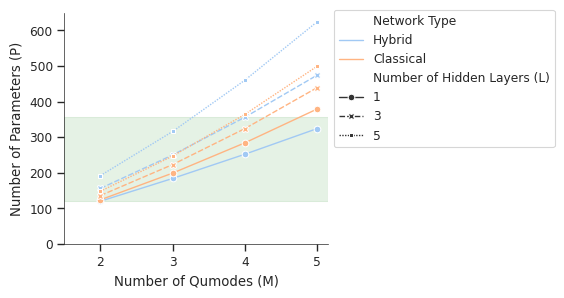

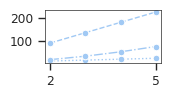

In [ ]:
from common_packages.utilities import get_num_parameters_per_quantum_layer
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from itertools import product
sns.set_style('ticks')
sns.set_context("paper")
palette = sns.color_palette('pastel')
sns.set_palette(palette)

colors = sns.color_palette('pastel')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 8
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["axes.linewidth"] = 0.5

%load_ext autoreload
%autoreload 2


# Parameter scaling plots
n_layers = [1,3,5]
num_qumodes = [2,3,4,5]
num_params = [get_num_parameters_per_quantum_layer(n)*l + n*5*(8+1) + 4*(n+1) for n,l in product(num_qumodes, n_layers)]

param_df = pd.DataFrame(columns=['n_layers', 'num_qumodes', 'num_params', 'network_type', 'input_params', 'output_params', 'hidden_params'])
for nl in n_layers:
    for nq in num_qumodes:
        quantum_params = get_num_parameters_per_quantum_layer(nq)*(nl)
        input_params = nq*5*(8+1)
        output_params = 4*(nq+1)
        total_quantum = quantum_params + input_params + output_params
        param_df.loc[len(param_df)] = [nl, nq, int(total_quantum), 'quantum', input_params, output_params, int(quantum_params)]
        
        classical_params = nq*(nq*5+1)
        classical_params += nq*(nq+1)*(nl-1)
        total_classical = classical_params + input_params + output_params
        param_df.loc[len(param_df)] = [nl, nq, int(total_classical), 'classical', input_params, output_params, int(classical_params)]

fig, ax = plt.subplots(1,1, figsize=(3.4, 3))
ax1 = sns.lineplot(param_df, x='num_qumodes', y='num_params', hue='network_type', style='n_layers', palette=palette[0:2], markers=True, ax=ax)
input_output_df = param_df[(param_df['network_type']=='quantum') & (param_df['n_layers']==1)]

plt.axhspan(ymin=120, ymax=356, color='green', alpha=0.1)
ax1.set_xlabel('Number of Qumodes (M)')
ax1.set_ylabel('Number of Parameters (P)')
handles, labels = ax.get_legend_handles_labels()
labels = ['Classical' if l=='classical' else 'Hybrid' if l=='quantum' else l for l in labels]
labels = ['Network Type' if l=='network_type' else 'Number of Hidden Layers (L)' if l=='n_layers' else l for l in labels]
plt.legend(labels=labels, handles=handles)
plt.ylim(bottom=0)
plt.xlim(left=1.5)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1.04))
sns.despine()
plt.savefig('./figures/param_scaling.svg', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(1.5, 0.7))
sns.lineplot(input_output_df, x='num_qumodes', y='input_params', color=palette[0], marker='o', ls='--',ax=ax)
sns.lineplot(input_output_df, x='num_qumodes', y='output_params', color=palette[0], marker='o', ls=':', ax=ax)
sns.lineplot(input_output_df, x='num_qumodes', y='hidden_params', color=palette[0], marker='o', ls='-.', ax=ax)
plt.xticks([2,5])
plt.xlabel('')
plt.ylabel('')
plt.savefig('./figures/param_scaling_seperated.svg', bbox_inches='tight')
plt.show()

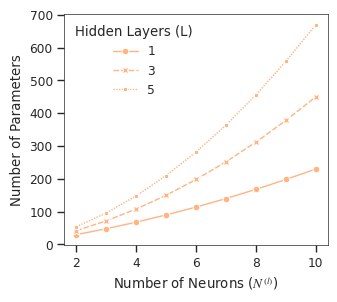

In [1]:
n_layers = [1,3,5]
num_neruons = [2, 3, 4, 5, 6, 7, 8, 9, 10]
input_size = 8
output_size = 4

param_df = pd.DataFrame(columns=['n_layers', 'num_neurons', 'num_params', 'input_params', 'output_params', 'hidden_params'])
for nl in n_layers:
    for nn in num_neruons:
        hidden_params = nn*(nn+1)*nl
        input_params = nn*input_size
        output_params = nn*output_size
        total_params = hidden_params + input_params + output_params
        param_df.loc[len(param_df)] = [nl, nn, int(total_params), input_params, output_params, int(hidden_params)]

fig, ax = plt.subplots(1,1, figsize=(3.4, 3))
ax1 = sns.lineplot(param_df, x='num_neurons', y='num_params', style='n_layers', color=palette[1], markers=True, ax=ax)
ax1.legend(title='Hidden Layers (L)', frameon=False)
ax1.set_xlabel('Number of Neurons ($N^{(l)}$)')
ax1.set_ylabel('Number of Parameters')

input_output_df = param_df[(param_df['n_layers']==1)]
plt.savefig('./figures/classical_parameters.svg')

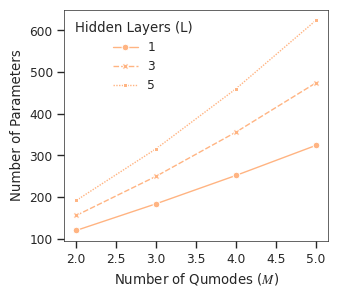

In [2]:
n_layers = [1,3,5]
num_qumodes = [2,3,4,5]
num_params = [get_num_parameters_per_quantum_layer(n)*l + n*5*(8+1) + 4*(n+1) for n,l in product(num_qumodes, n_layers)]

param_df = pd.DataFrame(columns=['n_layers', 'num_qumodes', 'num_params', 'input_params', 'output_params', 'hidden_params'])

for nl in n_layers:
    for nq in num_qumodes:
        quantum_params = get_num_parameters_per_quantum_layer(nq)*(nl)
        input_params = nq*5*(8+1)
        output_params = 4*(nq+1)
        total_quantum = quantum_params + input_params + output_params
        param_df.loc[len(param_df)] = [nl, nq, int(total_quantum), input_params, output_params, int(quantum_params)]


fig, ax = plt.subplots(1,1, figsize=(3.4, 3))
ax1 = sns.lineplot(param_df, x='num_qumodes', y='num_params', style='n_layers', color=palette[1], markers=True, ax=ax)
ax1.legend(title='Hidden Layers (L)', frameon=False)
ax1.set_xlabel('Number of Qumodes ($M$)')
ax1.set_ylabel('Number of Parameters')

input_output_df = param_df[(param_df['n_layers']==1)]
plt.savefig('./figures/quantum_parameters.svg')

# Noise Analysis
Apply noise to the weights of the network and see how the accuracy changes.

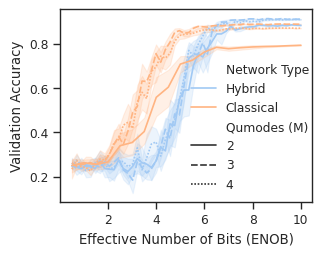

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel')
sns.set_context('paper')
palette = sns.color_palette('pastel')


def get_intersection_index(df):
    df = df.groupby(['network_type', 'enob']).mean().reset_index()
    df_classical = df[df['network_type']=='classical']
    df_quantum = df[df['network_type']=='quantum']
    

df_kerr8_noise_2_qumode = pd.read_pickle('./dataframes/enob_df.pkl', compression='xz')
df_kerr8_noise_3_qumode = pd.read_pickle('./dataframes/enob_df_3qumode.pkl', compression='xz')
df_kerr8_noise_4_qumode = pd.read_pickle('./dataframes/enob_df_4qumode.pkl', compression='xz')

df_kerr8_noise_classical = pd.read_pickle('./dataframes/enob_df_1layer_classical.pkl', compression='xz')

df_kerr8_noise_2_qumode.drop(df_kerr8_noise_2_qumode[df_kerr8_noise_2_qumode['network_type']=='classical'].index, inplace=True)
df_kerr8_noise_2_qumode = pd.concat([df_kerr8_noise_2_qumode, df_kerr8_noise_classical], ignore_index=True)





# fig, axs = plt.subplots(1,1, figsize=(3.25, 2.5), sharex=True, sharey=True)
# ax1 = sns.lineplot(df_kerr8_noise_2_qumode, x='enob', y='val_acc', hue='network_type', ax=axs)
# # ax2 = sns.lineplot(df_kerr8_noise_3_qumode, x='enob', y='val_acc', hue='network_type', ax=axs[1], legend=None)
# # ax3 = sns.lineplot(df_kerr8_noise_4_qumode, x='enob', y='val_acc', hue='network_type', ax=axs[2])

# ax1.set_xlabel('Effective Number of Bits (ENOB)')
# ax1.set_xticks([2,4,6,8,10])
# ax1.set_ylabel('Validation Accuracy')
# # ax1.set_xlabel('')
# # ax1.set_xticks([2,4,6,8,10])
# # ax1.set_title('2 Qumodes')
# # ax2.set_xlabel('Effective Number of Bits (ENOB)')
# # ax2.set_title('3 Qumodes')
# # ax3.set_xlabel('')
# # ax3.set_title('4 Qumodes')
# # ax1.set_ylabel('Validation Accuracy')
# # ax2.set_ylabel('')
# # ax3.set_ylabel('')
# # handles, labels = ax3.get_legend_handles_labels()
# # print(labels)
# # labels = ['Classical' if l=='classical' else 'Hybrid' if l=='quantum' else l for l in labels]
# # labels = ['Network Type' if l=='network_type' else 'Number of Hidden Layers (L)' if l=='n_layers' else l for l in labels]
# # plt.legend(labels=labels, handles=handles, title='Network Type')
# # #sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1.04))
# plt.savefig('./figures/enob_sweep_v2.svg', bbox_inches='tight')
# plt.show()

# fig, axs = plt.subplots(1,3, figsize=(8.5, 3.5), sharex=True, sharey=True)
# ax1 = sns.lineplot(df_kerr8_noise_2_qumode, x='enob', y='val_acc', hue='network_type', ax=axs[0],legend=None)
# ax2 = sns.lineplot(df_kerr8_noise_3_qumode, x='enob', y='val_acc', hue='network_type', ax=axs[1], legend=None)
# ax3 = sns.lineplot(df_kerr8_noise_4_qumode, x='enob', y='val_acc', hue='network_type', ax=axs[2])

# ax1.set_xlabel('Effective Number of Bits (ENOB)')
# ax1.set_xticks([2,4,6,8,10])
# ax1.set_ylabel('Validation Accuracy')
# ax1.set_xlabel('')
# ax1.set_xticks([2,4,6,8,10])
# ax1.set_title('2 Qumodes')
# ax2.set_xlabel('Effective Number of Bits (ENOB)')
# ax2.set_title('3 Qumodes')
# ax3.set_xlabel('')
# ax3.set_title('4 Qumodes')
# ax1.set_ylabel('Validation Accuracy')
# ax2.set_ylabel('')
# ax3.set_ylabel('')
# handles, labels = ax3.get_legend_handles_labels()
# print(labels)
# labels = ['Classical' if l=='classical' else 'Hybrid' if l=='quantum' else l for l in labels]
# labels = ['Network Type' if l=='network_type' else 'Number of Hidden Layers (L)' if l=='n_layers' else l for l in labels]
# plt.legend(labels=labels, handles=handles, title='Network Type')
# #sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1.04))
# # plt.savefig('./figures/enob_sweep_all.pdf', bbox_inches='tight')
# plt.show()

df_kerr8_noise_all_qumodes = pd.concat([df_kerr8_noise_2_qumode, df_kerr8_noise_3_qumode, df_kerr8_noise_4_qumode], ignore_index=True)
fig, axs = plt.subplots(1, 1, figsize=(3.25, 2.5))
ax1 = sns.lineplot(df_kerr8_noise_all_qumodes, x='enob', y='val_acc', hue='network_type', style='num_qumodes', ax=axs)

ax1.set_xlabel('Effective Number of Bits (ENOB)')
ax1.set_ylabel('Validation Accuracy')

handles, labels = ax1.get_legend_handles_labels()
labels = ['Classical' if l=='classical' else 'Hybrid' if l=='quantum' else l for l in labels]
labels = ['Network Type' if l=='network_type' else 'Qumodes (M)' if l=='num_qumodes' else l for l in labels]
plt.legend(labels=labels, handles=handles, frameon=False, loc='lower right', bbox_to_anchor=(1.03, 0))
plt.savefig('./figures/enob_sweep_all_qumodes.pdf', bbox_inches='tight')
plt.show()


In [4]:

# Assuming 'network_type', 'performance', and 'ENOB' are column names in df_kerr8_noise_2_qumode
# And assuming 'performance' is the metric to reach within 5% of its maximum

# Filter for classical and hybrid networks
classical_df = df_kerr8_noise_2_qumode[df_kerr8_noise_2_qumode['network_type'] == 'classical']
hybrid_df = df_kerr8_noise_2_qumode[df_kerr8_noise_2_qumode['network_type'] == 'quantum']

hybrid_df = hybrid_df.groupby(['num_qumodes', 'n_layers', 'network_type', 'exp_folder', 'enob']).mean().reset_index()
classical_df = classical_df.groupby(['num_qumodes', 'n_layers', 'network_type', 'exp_folder', 'enob']).mean().reset_index()
df_kerr8_noise_2_qumode = df_kerr8_noise_2_qumode.groupby(['num_qumodes', 'n_layers', 'network_type', 'exp_folder', 'enob']).mean().reset_index()
# Function to find ENOB
def find_enob_threshold(df):
    max_performance = df['val_acc'].max()
    threshold = max_performance * 0.90
    print(threshold)
    enob_at_threshold = df[df['val_acc'] >= threshold]['enob'].min()
    return enob_at_threshold



# Find ENOB for classical and hybrid networks
enob_classical = find_enob_threshold(classical_df)
enob_hybrid = find_enob_threshold(hybrid_df)

print(f"Classical Network ENOB at 90% of max: {enob_classical}")
print(f"Hybrid Network ENOB at 90% of max: {enob_hybrid}")


import pandas as pd

# Assuming classical_df and hybrid_df are already defined and contain 'ENOB' and 'val_acc' columns
# Merge the dataframes on ENOB
merged_df = pd.merge(classical_df[['network_type', 'enob', 'val_acc']], hybrid_df[['network_type', 'enob', 'val_acc']], on='enob', suffixes=('_classical', '_hybrid'))

# Calculate the difference in performance between classical and hybrid for each ENOB
merged_df['performance_diff'] = merged_df['val_acc_classical'] - merged_df['val_acc_hybrid']


# Find the crossover point where the sign of the difference changes
# This indicates the ENOB value where one network's performance surpasses the other
crossover_points = merged_df[merged_df['performance_diff'].diff().abs() > 0]
print(crossover_points)
if not crossover_points.empty:
    # If there are multiple crossover points, this will take the first
    crossover_enob = crossover_points['enob'].min()
    print(f"Crossover ENOB: {crossover_enob}")
else:
    print("No crossover point found.")


0.7137000167369842
0.7964999914169312
Classical Network ENOB at 90% of max: 5.5
Hybrid Network ENOB at 90% of max: 6.316326530612245
  network_type_classical  enob val_acc_classical network_type_hybrid  \
1              classical  10.0             0.793             quantum   

  val_acc_hybrid performance_diff  
1       0.882667        -0.089667  
Crossover ENOB: 10.0


,amplitude_enob,phase_enob,val_acc,acc,loss,sample
0,0.5,0.5,0.029496,0.031998,0.921880,1.581139
1,0.5,1.0,0.010165,0.037107,0.276451,1.581139
2,0.5,1.5,0.011926,0.016709,0.295562,1.581139
3,0.5,2.0,0.000000,0.006500,0.238890,1.581139
4,0.5,2.5,0.001491,0.042563,0.685574,1.581139


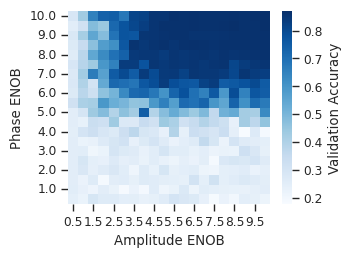

In [5]:
from scipy.interpolate import griddata

df_kerr8_noise_amp_phase_full = pd.read_pickle('./dataframes/amp_phase_df.pkl')
df_kerr8_noise_amp_phase = df_kerr8_noise_amp_phase_full[['amplitude_enob', 'phase_enob', 'val_acc', 'acc', 'loss', 'sample']]
df_kerr8_noise_amp_phase_std = df_kerr8_noise_amp_phase.groupby(['amplitude_enob', 'phase_enob']).std().reset_index()
df_kerr8_noise_amp_phase = df_kerr8_noise_amp_phase.groupby(['amplitude_enob', 'phase_enob']).mean().reset_index()
df_kerr8_noise_amp_phase = df_kerr8_noise_amp_phase.apply(pd.to_numeric, errors='coerce').round(3)
df_kerr8_noise_amp_phase.drop(['sample'], inplace=True, axis=1)
display(df_kerr8_noise_amp_phase_std.head())

fig, ax = plt.subplots(1,1, figsize=(3.25, 2.5))
ax1 = sns.heatmap(df_kerr8_noise_amp_phase.pivot(columns='amplitude_enob', index='phase_enob', values='val_acc')[::-1],
                  cmap='Blues', ax=ax,
                  cbar_kws={'label': 'Validation Accuracy'})
ax1.set_xlabel('Amplitude ENOB')
ax1.set_ylabel('Phase ENOB')
plt.savefig('./figures/amp_phase_enob_sweep.pdf', bbox_inches='tight')
plt.show()


/tmp/ipykernel_222570/1968819528.py:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax1 = sns.lineplot(df_kerr8_noise_gate, x='enob', y='val_acc', hue='gate', palette=palette[14:])


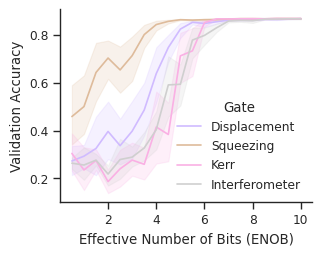

/tmp/ipykernel_222570/1968819528.py:51: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(df_kerr8_noise_gate, x='enob_params', y='val_acc', hue='gate', palette=palette[14:])


<Axes: xlabel='enob_params', ylabel='val_acc'>

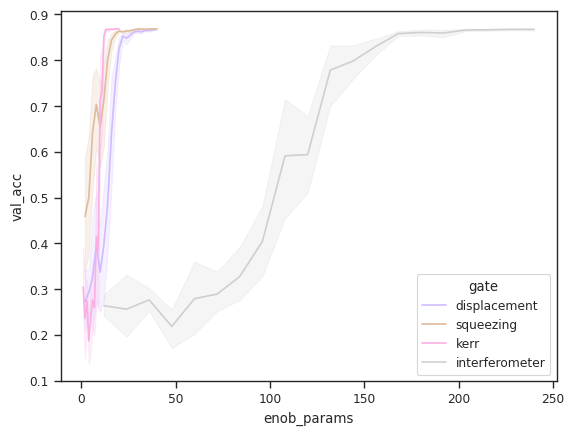

In [6]:
import pandas as pd

def params_per_gate(num_qumodes, n_layers, gate_type):
    if gate_type == 'displacement':
        return 2*num_qumodes*n_layers
    elif gate_type == 'squeezing':
        return 2*num_qumodes*n_layers
    elif gate_type == 'kerr':
        return num_qumodes*n_layers
    elif gate_type == 'interferometer':
        K = num_qumodes * (num_qumodes - 1) + 2*num_qumodes
        return 4*K*n_layers
    
def find_enob_threshold(df):
    max_performance = df['val_acc'].max()
    threshold = max_performance * 0.90
    print(threshold)
    enob_at_threshold = df[df['val_acc'] >= threshold]['enob'].min()
    return enob_at_threshold

palette = sns.color_palette('pastel', 24)

df_kerr8_noise_gate = pd.read_pickle('./dataframes/quantum_noise_df.pkl', )

df_kerr8_noise_gate = pd.melt(df_kerr8_noise_gate,
                              id_vars=['network_type', 'n_layers', 'num_qumodes', 'cutoff', 'exp_folder', 'epoch', 'val_acc'],
                              var_name='gate', value_name='enob', value_vars=['displacement_enob', 'squeezing_enob', 'kerr_enob', 'interferometer_enob'])
df_kerr8_noise_gate['gate'] = df_kerr8_noise_gate['gate'].apply(lambda x: x.split('_')[0])
df_kerr8_noise_gate.drop(df_kerr8_noise_gate[df_kerr8_noise_gate['enob']==32].index, inplace=True)

df_kerr8_noise_gate['val_acc_per_param'] = df_kerr8_noise_gate.apply(lambda x: x['val_acc'] / params_per_gate(x['num_qumodes'], x['n_layers'], x['gate']), axis=1)
df_kerr8_noise_gate['enob_params'] = df_kerr8_noise_gate.apply(lambda x: x['enob'] * params_per_gate(x['num_qumodes'], x['n_layers'], x['gate']), axis=1)

fig = plt.figure(figsize=(3.25, 2.5))
ax1 = sns.lineplot(df_kerr8_noise_gate, x='enob', y='val_acc', hue='gate', palette=palette[14:])
sns.despine()
plt.xlabel('Effective Number of Bits (ENOB)')
plt.ylabel('Validation Accuracy')

plt.legend(title='Gate',frameon=False)
legend_texts = ax1.get_legend().get_texts()  # Get the legend text objects
for text in legend_texts:
    text.set_text(text.get_text().title())  # Capitalize each legend entry
plt.savefig('./figures/gate_enob_sweep.svg', bbox_inches='tight')

# df_kerr8_noise_gate = df_kerr8_noise_gate.groupby(['network_type', 'n_layers', 'num_qumodes', 'cutoff', 'exp_folder', 'epoch', 'gate', 'enob']).mean().reset_index()

plt.show()


sns.lineplot(df_kerr8_noise_gate, x='enob_params', y='val_acc', hue='gate', palette=palette[14:])

In [7]:

df_kerr8_noise_displacement = df_kerr8_noise_gate[df_kerr8_noise_gate['gate']=='displacement']
df_kerr8_noise_squeezing = df_kerr8_noise_gate[df_kerr8_noise_gate['gate']=='squeezing']
df_kerr8_noise_kerr = df_kerr8_noise_gate[df_kerr8_noise_gate['gate']=='kerr']
df_kerr8_noise_interferometer = df_kerr8_noise_gate[df_kerr8_noise_gate['gate']=='interferometer']

displacement_enob = find_enob_threshold(df_kerr8_noise_displacement)
squeezing_enob = find_enob_threshold(df_kerr8_noise_squeezing)
kerr_enob = find_enob_threshold(df_kerr8_noise_kerr)
interferometer_enob = find_enob_threshold(df_kerr8_noise_interferometer)

print(f"Displacement Gate ENOB at 90% of max: {displacement_enob}")
print(f"Squeezing Gate ENOB at 90% of max: {squeezing_enob}")
print(f"Kerr Gate ENOB at 90% of max: {kerr_enob}")
print(f"Interferometer Gate ENOB at 90% of max: {interferometer_enob}")


print(df_kerr8_noise_gate['val_acc'].max())

0.7830000042915345
0.7860000014305115
0.7860000014305115
0.7860000014305115
Displacement Gate ENOB at 90% of max: 1.5
Squeezing Gate ENOB at 90% of max: 0.5
Kerr Gate ENOB at 90% of max: 4.0
Interferometer Gate ENOB at 90% of max: 4.5
0.8733333349227905


,cutoff,n_layers,network_type,num_qumodes,epoch,exp_folder,val_acc,val_loss,sample,shots
0,11,1,quantum,2,199,/home/st4eve/Mounts/Classical_Small_kerr_all_w...,0.403333,2.942665,NaN,1
1,11,1,quantum,2,199,/home/st4eve/Mounts/Classical_Small_kerr_all_w...,0.346667,2.940595,NaN,1
2,11,1,quantum,2,199,/home/st4eve/Mounts/Classical_Small_kerr_all_w...,0.406667,2.887366,NaN,1
3,11,1,quantum,2,199,/home/st4eve/Mounts/Classical_Small_kerr_all_w...,0.376667,2.855608,NaN,1
4,11,1,quantum,2,199,/home/st4eve/Mounts/Classical_Small_kerr_all_w...,0.413333,3.023938,NaN,1


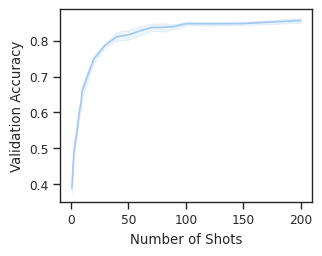

In [8]:
# Shot noise plot

df_kerr8_noise_shot = pd.read_pickle('./dataframes/shot_df.pkl')
display(df_kerr8_noise_shot.head())

fig, ax = plt.subplots(1,1, figsize=(3.25, 2.5))
ax1 = sns.lineplot(df_kerr8_noise_shot, x='shots', y='val_acc',ax=ax)
ax1.set_xlabel('Number of Shots')
ax1.set_ylabel('Validation Accuracy')

plt.savefig('./figures/shot_noise_sweep.pdf', bbox_inches='tight')


